In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [211]:
df = pd.read_csv("/content/drive/MyDrive/nyc-rolling-sales.csv")

In [212]:
df_c = pd.read_csv("/content/drive/MyDrive/nyc-rolling-sales.csv")

In [213]:
df_c['COMMERCIAL UNITS'].quantile(0.999)

13.0

# **DATA CLEANING**

In [214]:
df.sample()

Unnamed: 0  BOROUGH NEIGHBORHOOD  \
40705       15354        3   GREENPOINT   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
40705  03 THREE FAMILY DWELLINGS                                      1   

       BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT                ADDRESS  \
40705   2620   22                                  C0  6331/2 LEONARD STREET   

       ... RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
40705  ...                 3                 0            3              1658   

       GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
40705               3024       1899                         1   

       BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
40705                              C0     2175000  2017-06-22 00:00:00  

[1 rows x 22 columns]

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [216]:
# convert column names to lowercase
df.columns = df.columns.str.lower()

In [217]:
#looking for columns that have rows that equal just " -  "
columns_to_null = []
for column in df.columns:
  if df[column].dtype == 'object' and (df[column] == ' -  ').any():
    print(f"{column} - True")
    columns_to_null.append(column)

land square feet - True
gross square feet - True
sale price - True


In [218]:
columns_to_null

['land square feet', 'gross square feet', 'sale price']

In [219]:
#change those values that are " -  " to Nan
for column in columns_to_null:
  df.loc[df[column].str.contains("-"),column] = pd.NA

<Axes: >

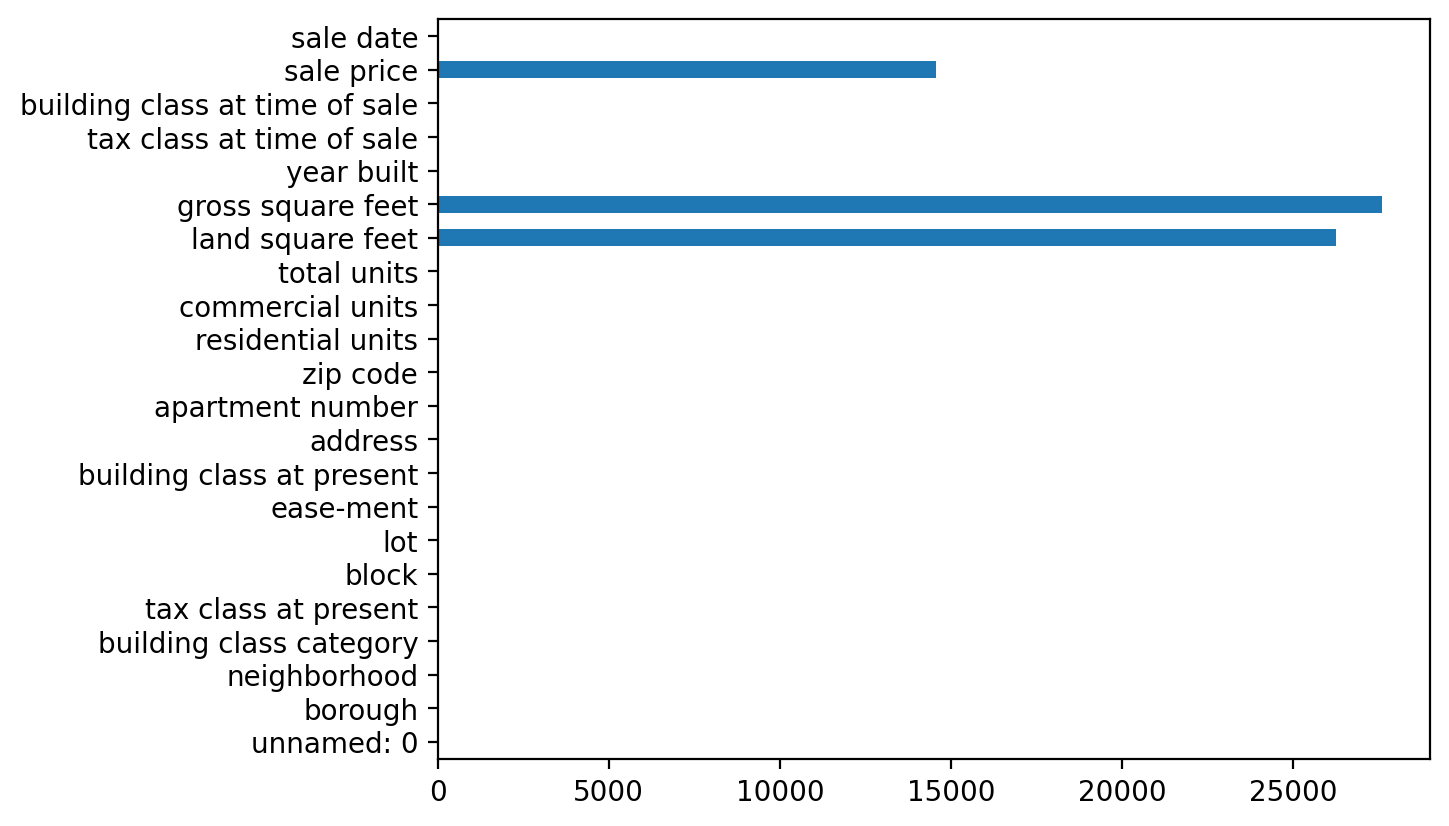

In [220]:
df.isna().sum().plot(kind = 'barh')

In [221]:
df.dropna(inplace = True)

In [222]:
df.isna().sum()

unnamed: 0                        0
borough                           0
neighborhood                      0
building class category           0
tax class at present              0
block                             0
lot                               0
ease-ment                         0
building class at present         0
address                           0
apartment number                  0
zip code                          0
residential units                 0
commercial units                  0
total units                       0
land square feet                  0
gross square feet                 0
year built                        0
tax class at time of sale         0
building class at time of sale    0
sale price                        0
sale date                         0
dtype: int64

In [223]:
df.describe()

unnamed: 0  borough    block      lot  zip code  residential units  \
count    48244.00 48244.00 48244.00 48244.00  48244.00           48244.00   
mean     10448.94     3.25  4984.53   234.32  10939.68               2.57   
std       7574.42     0.90  3427.42   496.36   1072.75              17.47   
min          4.00     1.00     1.00     1.00      0.00               0.00   
25%       3919.75     3.00  2206.75    21.00  10469.00               1.00   
50%       8084.00     3.00  4660.50    45.00  11217.00               1.00   
75%      17160.00     4.00  6996.00    94.00  11237.00               2.00   
max      26702.00     5.00 16319.00  9009.00  11694.00            1844.00   

       commercial units  total units  year built  tax class at time of sale  
count          48244.00     48244.00    48244.00                   48244.00  
mean               0.25         2.83     1827.77                       1.48  
std               10.99        20.75      464.36                       0.83  
min                0.00         0.00        0.00                       1.00  
25%                0.00         1.00     1920.00                       1.00  
50%                0.00         1.00     1931.00                       1.00  
75%                0.00         2.00     1961.00                       2.00  
max             2261.00      2261.00     2017.00                       4.00

In [224]:
df['building class category'] = df['building class category'].apply(lambda x: x.rstrip() if pd.notnull(x) else x)

In [225]:
# function to convert a column datatype
def convert_type(cols,type):
  for col in cols:
    df[col] = df[col].astype(type)

In [226]:
convert_to_int = ['land square feet','gross square feet','sale price']

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48244 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   unnamed: 0                      48244 non-null  int64 
 1   borough                         48244 non-null  int64 
 2   neighborhood                    48244 non-null  object
 3   building class category         48244 non-null  object
 4   tax class at present            48244 non-null  object
 5   block                           48244 non-null  int64 
 6   lot                             48244 non-null  int64 
 7   ease-ment                       48244 non-null  object
 8   building class at present       48244 non-null  object
 9   address                         48244 non-null  object
 10  apartment number                48244 non-null  object
 11  zip code                        48244 non-null  int64 
 12  residential units               48244 non-null  int

In [228]:
convert_type(convert_to_int,int)

In [229]:
df['sale date'] = pd.to_datetime(df['sale date'])

In [230]:
df['sale date'].min(), df['sale date'].max()

(Timestamp('2016-09-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [231]:
df['sale month'] = df['sale date'].dt.strftime("%B")

In [232]:
def season(month):
  if month in ['March', 'April', 'May']:
      return "Spring"
  elif month in ['June', 'July', 'August']:
      return "Summer"
  elif month in ['December', 'January', 'February']:
      return "Winter"
  else:
      return "Autumn"

In [233]:
df['sale season'] = df['sale month'].apply(lambda month: season(month))

In [234]:
df.loc[df['building class at present'] != df['building class at time of sale']].head(2)

unnamed: 0  borough    neighborhood         building class category  \
4914        4918        1  HARLEM-CENTRAL  07 RENTALS - WALKUP APARTMENTS   
6128        6132        1    HARLEM-UPPER         37 RELIGIOUS FACILITIES   

     tax class at present  block  lot ease-ment building class at present  \
4914                    1   1911  148                                  B1   
6128                    1   2074  119                                  B1   

                    address  ... total units  land square feet  \
4914           130 W 127 ST  ...           2              1557   
6128  513 WEST 142ND STREET  ...           2              1599   

      gross square feet  year built  tax class at time of sale  \
4914               2343        1910                          2   
6128               3516        1926                          4   

      building class at time of sale  sale price  sale date  sale month  \
4914                              C3     2525000 2016-10-25     October   
6128                              M1     2890000 2017-01-13     January   

     sale season  
4914      Autumn  
6128      Winter  

[2 rows x 24 columns]

In [235]:
df.head()

unnamed: 0  borough   neighborhood           building class category  \
0           4        1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
3           7        1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
4           8        1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
6          10        1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
9          13        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS   

  tax class at present  block  lot ease-ment building class at present  \
0                   2A    392    6                                  C2   
3                   2B    402   21                                  C4   
4                   2A    404   55                                  C2   
6                   2B    406   32                                  C4   
9                    2    387  153                                  D9   

                  address  ... total units  land square feet  \
0            153 AVENUE B  ...           5              1633   
3     154 EAST 7TH STREET  ...          10              2272   
4  301 EAST 10TH   STREET  ...           6              2369   
6            210 AVENUE B  ...           8              1750   
9     629 EAST 5TH STREET  ...          24              4489   

   gross square feet  year built  tax class at time of sale  \
0               6440        1900                          2   
3               6794        1913                          2   
4               4615        1900                          2   
6               4226        1920                          2   
9              18523        1920                          2   

   building class at time of sale  sale price  sale date  sale month  \
0                              C2     6625000 2017-07-19        July   
3                              C4     3936272 2016-09-23   September   
4                              C2     8000000 2016-11-17    November   
6                              C4     3192840 2016-09-23   September   
9                              D9    16232000 2016-11-07    November   

  sale season  
0      Summer  
3      Autumn  
4      Autumn  
6      Autumn  
9      Autumn  

[5 rows x 24 columns]

In [236]:
df.drop(['unnamed: 0','neighborhood','address','apartment number','block','lot','building class at present','building class at time of sale','zip code','tax class at present','ease-ment'], axis = 1, inplace = True)

In [237]:
df.rename(columns = {'tax class at time of sale':'tax class'}, inplace = True)

In [238]:
boroughs = {
    1:"Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}

In [239]:
df["borough"] = df["borough"].map(boroughs)

In [240]:
df.reset_index( inplace = True)

In [241]:
df.drop('index',inplace = True, axis = 1)

In [252]:
df.describe()

Residential Units  Commercial Units  Total Units  Land Square Feet  \
count           31107.00          31107.00     31107.00          31107.00   
mean                1.75              0.16         1.91           2692.26   
min                 0.00              0.00         1.00              0.00   
25%                 1.00              0.00         1.00           1840.00   
50%                 1.00              0.00         1.00           2410.00   
75%                 2.00              0.00         2.00           3443.50   
max                27.00           2261.00      2261.00          14000.00   
std                 1.53             12.83        12.91           1784.18   

       Gross Square Feet  Year Built  Tax Class  Sale Price  \
count           31107.00    31107.00   31107.00    31107.00   
mean             1945.26     1946.20       1.23   821081.16   
min                 0.00     1899.00       1.00        1.00   
25%              1217.00     1920.00       1.00   425000.00   
50%              1694.00     1935.00       1.00   625000.00   
75%              2400.00     1965.00       1.00   939000.00   
max             14880.00     2017.00       4.00  6838414.00   
std              1466.63       34.61       0.60   771430.36   

                           Sale Date  
count                          31107  
mean   2017-02-26 00:35:08.130002944  
min              2016-09-01 00:00:00  
25%              2016-11-30 00:00:00  
50%              2017-02-27 00:00:00  
75%              2017-05-26 00:00:00  
max              2017-08-31 00:00:00  
std                              NaN

In [243]:
df.drop(df.loc[df['sale price'] == 0].index, inplace = True)

In [244]:
df.drop(df.loc[(df['commercial units'] == 0 ) & (df['residential units'] == 0 )].index, inplace = True)

In [245]:
df['total units'] = df['residential units'] + df['commercial units']

In [246]:
df.columns = df.columns.str.title()

In [247]:
cols_fliers = ['Residential Units','Land Square Feet','Gross Square Feet','Sale Price']
for col in cols_fliers:
  df.drop(df.loc[df[col] >= df[col].quantile(0.99)].index, inplace = True)

In [248]:
df.drop(df.loc[df['Year Built'] < df['Year Built'].quantile(0.05)].index, inplace = True)

In [249]:
df.head()

Borough         Building Class Category  Residential Units  \
0  Manhattan  07 RENTALS - WALKUP APARTMENTS                  5   
1  Manhattan  07 RENTALS - WALKUP APARTMENTS                 10   
3  Manhattan  07 RENTALS - WALKUP APARTMENTS                  8   
7  Manhattan          14 RENTALS - 4-10 UNIT                  3   
9  Manhattan          14 RENTALS - 4-10 UNIT                  5   

   Commercial Units  Total Units  Land Square Feet  Gross Square Feet  \
0                 0            5              1633               6440   
1                 0           10              2272               6794   
3                 0            8              1750               4226   
7                 1            4              1520               3360   
9                 1            6              1779               3713   

   Year Built  Tax Class  Sale Price  Sale Date Sale Month Sale Season  
0        1900          2     6625000 2017-07-19       July      Summer  
1        1913          2     3936272 2016-09-23  September      Autumn  
3        1920          2     3192840 2016-09-23  September      Autumn  
7        1910          2     3300000 2016-11-15   November      Autumn  
9        1910          2     4750000 2017-04-03      April      Spring

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31107 entries, 0 to 48243
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Borough                  31107 non-null  object        
 1   Building Class Category  31107 non-null  object        
 2   Residential Units        31107 non-null  int64         
 3   Commercial Units         31107 non-null  int64         
 4   Total Units              31107 non-null  int64         
 5   Land Square Feet         31107 non-null  int64         
 6   Gross Square Feet        31107 non-null  int64         
 7   Year Built               31107 non-null  int64         
 8   Tax Class                31107 non-null  int64         
 9   Sale Price               31107 non-null  int64         
 10  Sale Date                31107 non-null  datetime64[ns]
 11  Sale Month               31107 non-null  object        
 12  Sale Season              31107 non-nu

In [251]:
df.columns

Index(['Borough', 'Building Class Category', 'Residential Units',
       'Commercial Units', 'Total Units', 'Land Square Feet',
       'Gross Square Feet', 'Year Built', 'Tax Class', 'Sale Price',
       'Sale Date', 'Sale Month', 'Sale Season'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

In [198]:
df['Sale Price'].describe()

count      29976.00
mean      863057.32
std       972018.37
min          500.00
25%       435000.00
50%       630000.00
75%       940000.00
max     14900000.00
Name: Sale Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Sale Price')

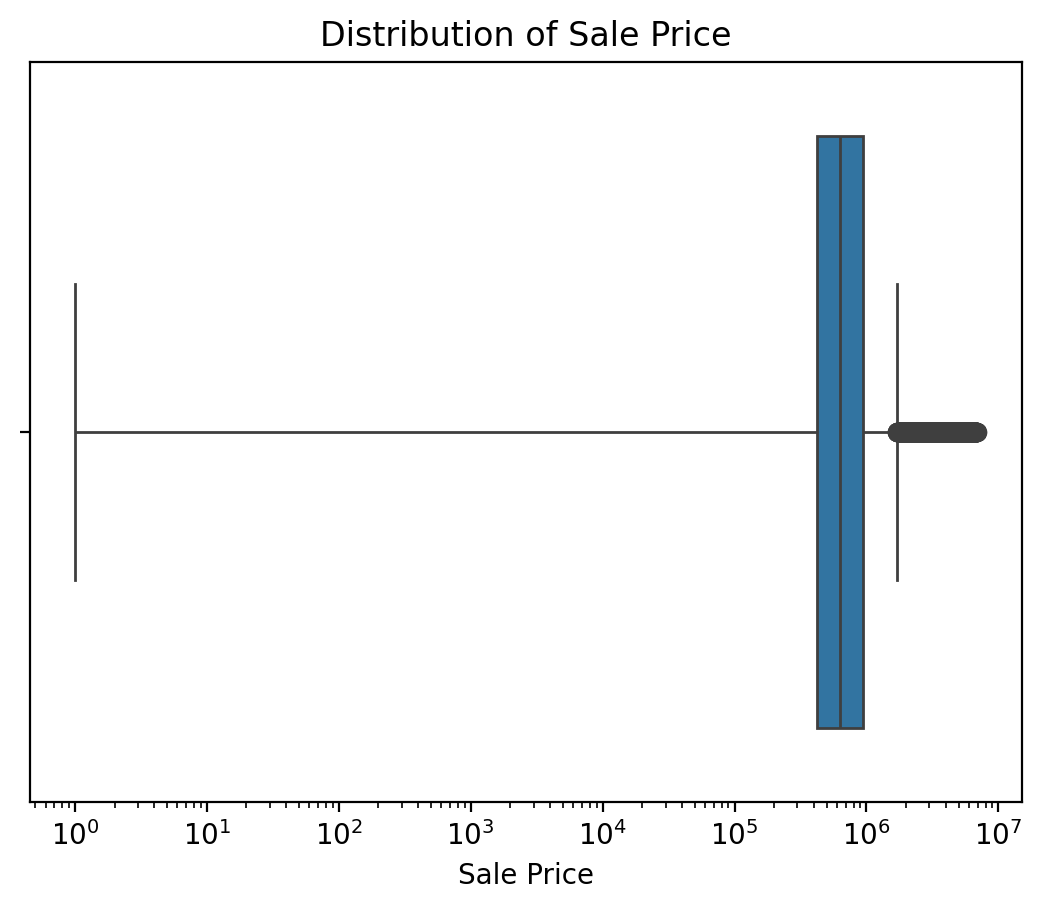

In [253]:
sns.boxplot(data = df, x = 'Sale Price')
plt.xscale('log')
plt.title('Distribution of Sale Price')

Text(0.5, 1.0, 'Average Price for Each Borough')

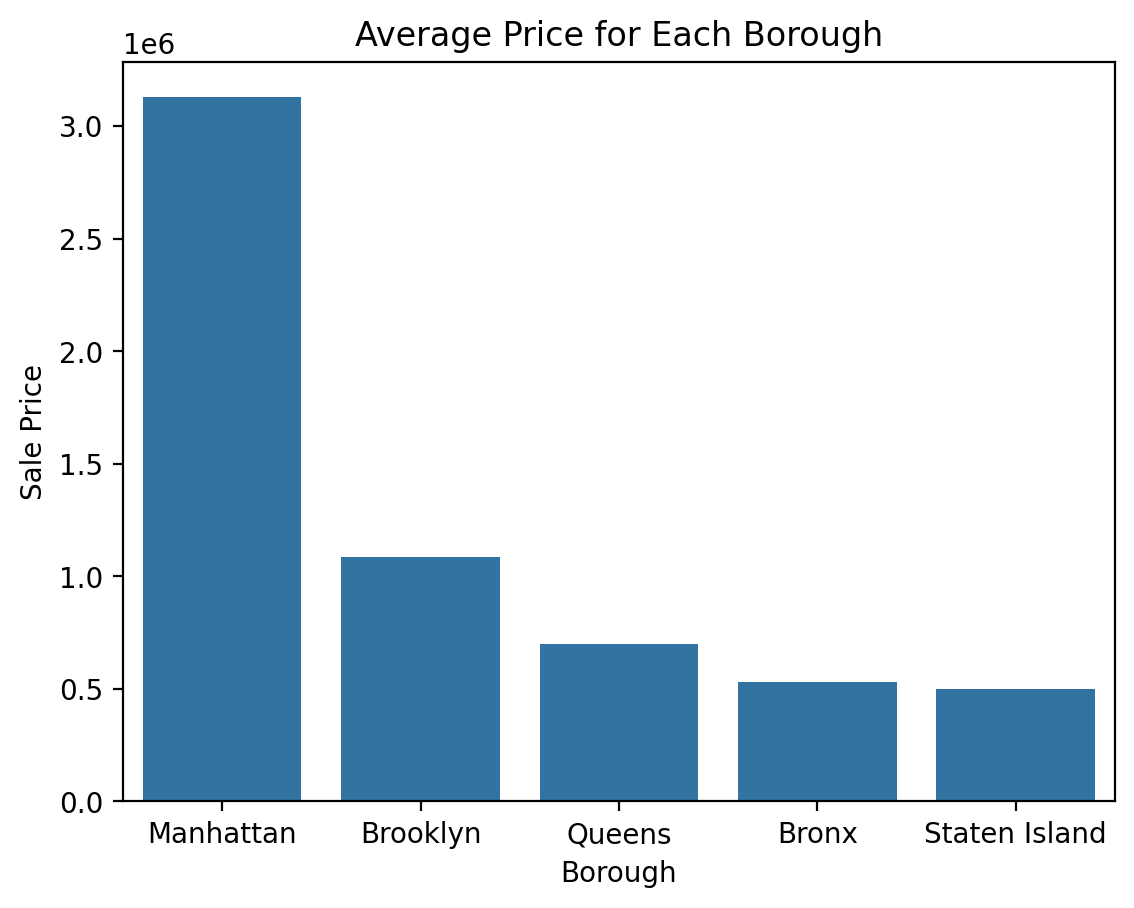

In [254]:
sns.barplot(data = df.groupby('Borough')[['Sale Price']].mean().sort_values(by="Sale Price",ascending = False), x='Borough', y = 'Sale Price',ci=None)
plt.title('Average Price for Each Borough')

In [255]:
man_df = df.loc[df['Borough'] == 'Manhattan']

In [256]:
man_df['Building Class Category'].unique()

array(['07 RENTALS - WALKUP APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '22 STORE BUILDINGS', '01 ONE FAMILY DWELLINGS', '26 OTHER HOTELS',
       '41 TAX CLASS 4 - OTHER', '02 TWO FAMILY DWELLINGS',
       '23 LOFT BUILDINGS', '03 THREE FAMILY DWELLINGS',
       '21 OFFICE BUILDINGS', '29 COMMERCIAL GARAGES',
       '37 RELIGIOUS FACILITIES', '40 SELECTED GOVERNMENTAL FACILITIES',
       '27 FACTORIES', '30 WAREHOUSES', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS'], dtype=object)

In [257]:
cols_man_df = ['Residential Units','Commercial Units','Land Square Feet','Gross Square Feet']

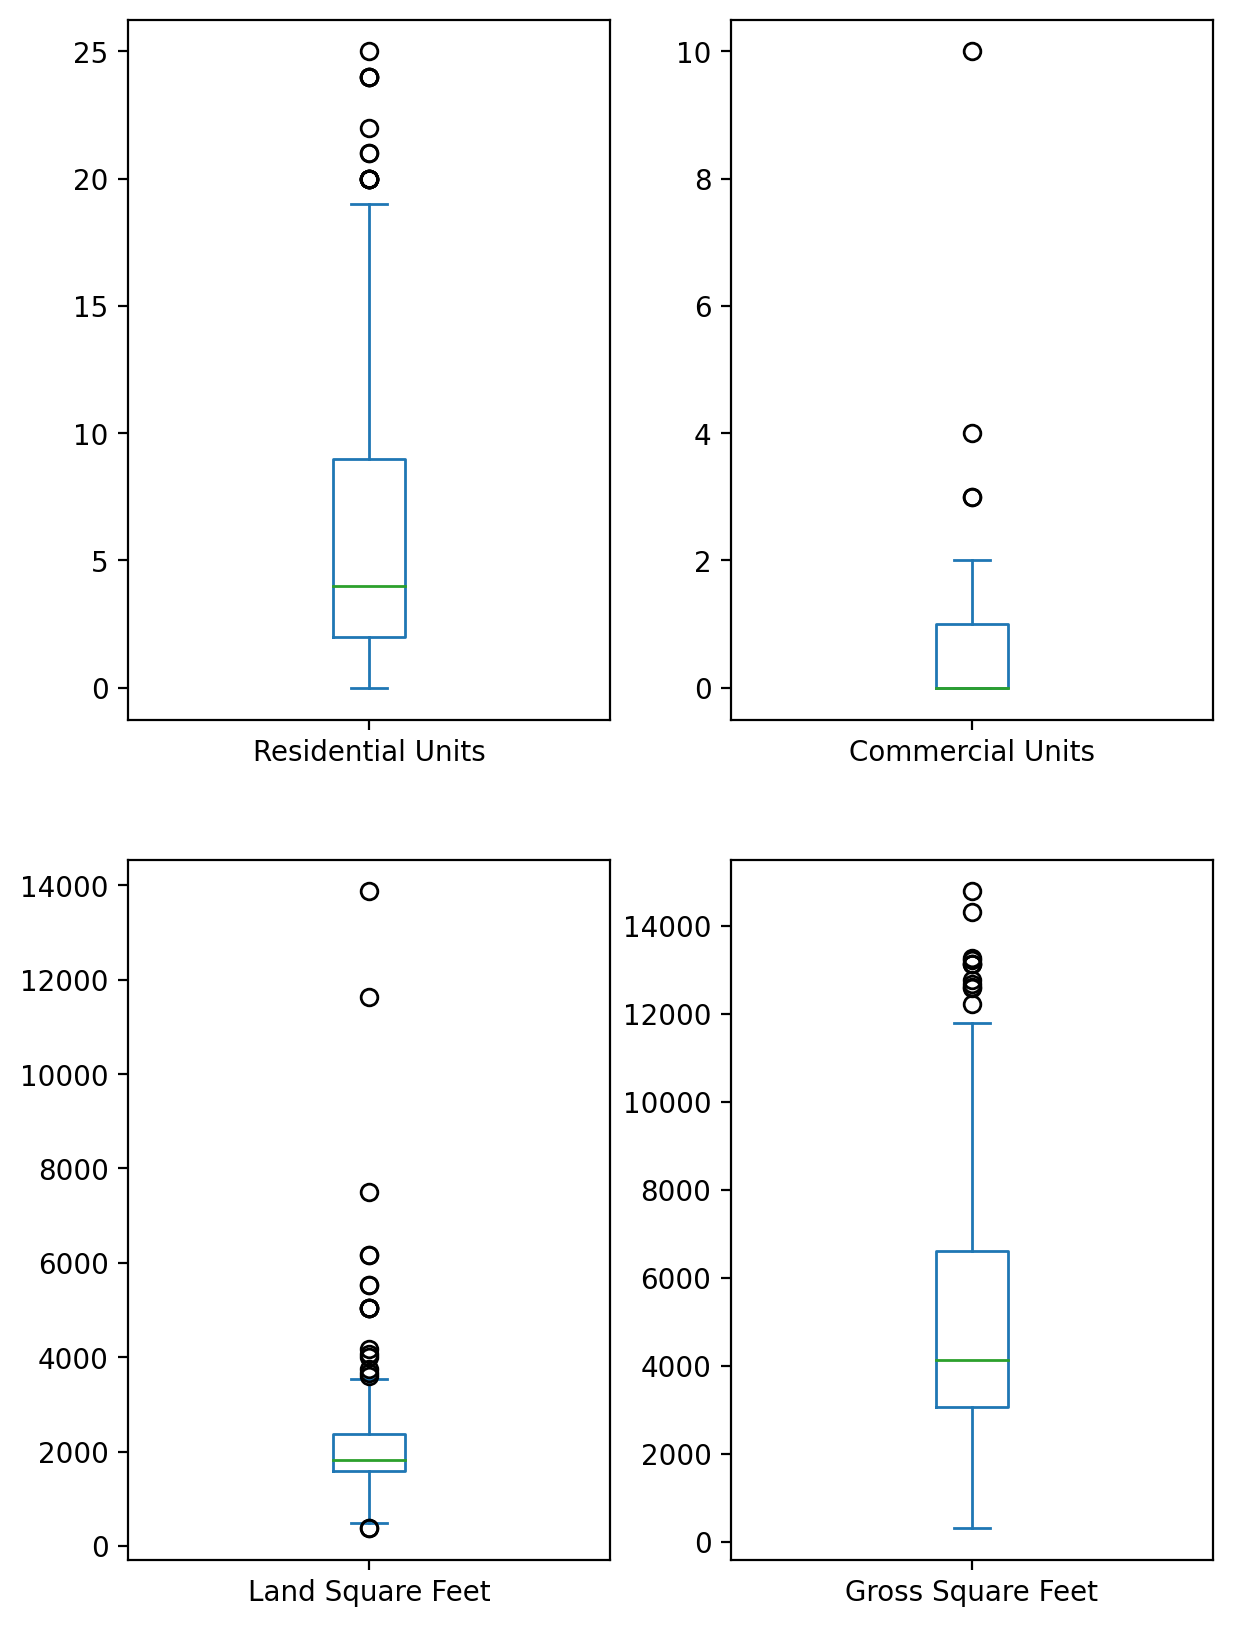

In [286]:
man_df[cols_man_df].plot(kind = 'box', subplots=True, layout = (2,2), figsize=(7,10))
plt.subplots_adjust(wspace = 0.25)
plt.show()

In [259]:
others_df = df.loc[df['Borough'] != 'Manhattan']

In [260]:
man_gr = man_df.groupby('Building Class Category')[['Sale Price']].mean().sort_values(by = 'Sale Price', ascending = False).reset_index().head(10)
man_gr

Building Class Category  Sale Price
0           29 COMMERCIAL GARAGES  6750000.00
1          41 TAX CLASS 4 - OTHER  4700000.00
2             21 OFFICE BUILDINGS  4008335.00
3                 26 OTHER HOTELS  3900000.00
4          14 RENTALS - 4-10 UNIT  3731674.21
5                    27 FACTORIES  3700000.00
6                   30 WAREHOUSES  3450000.00
7    09 COOPS - WALKUP APARTMENTS  3345000.00
8  07 RENTALS - WALKUP APARTMENTS  3183316.98
9              22 STORE BUILDINGS  3161480.00

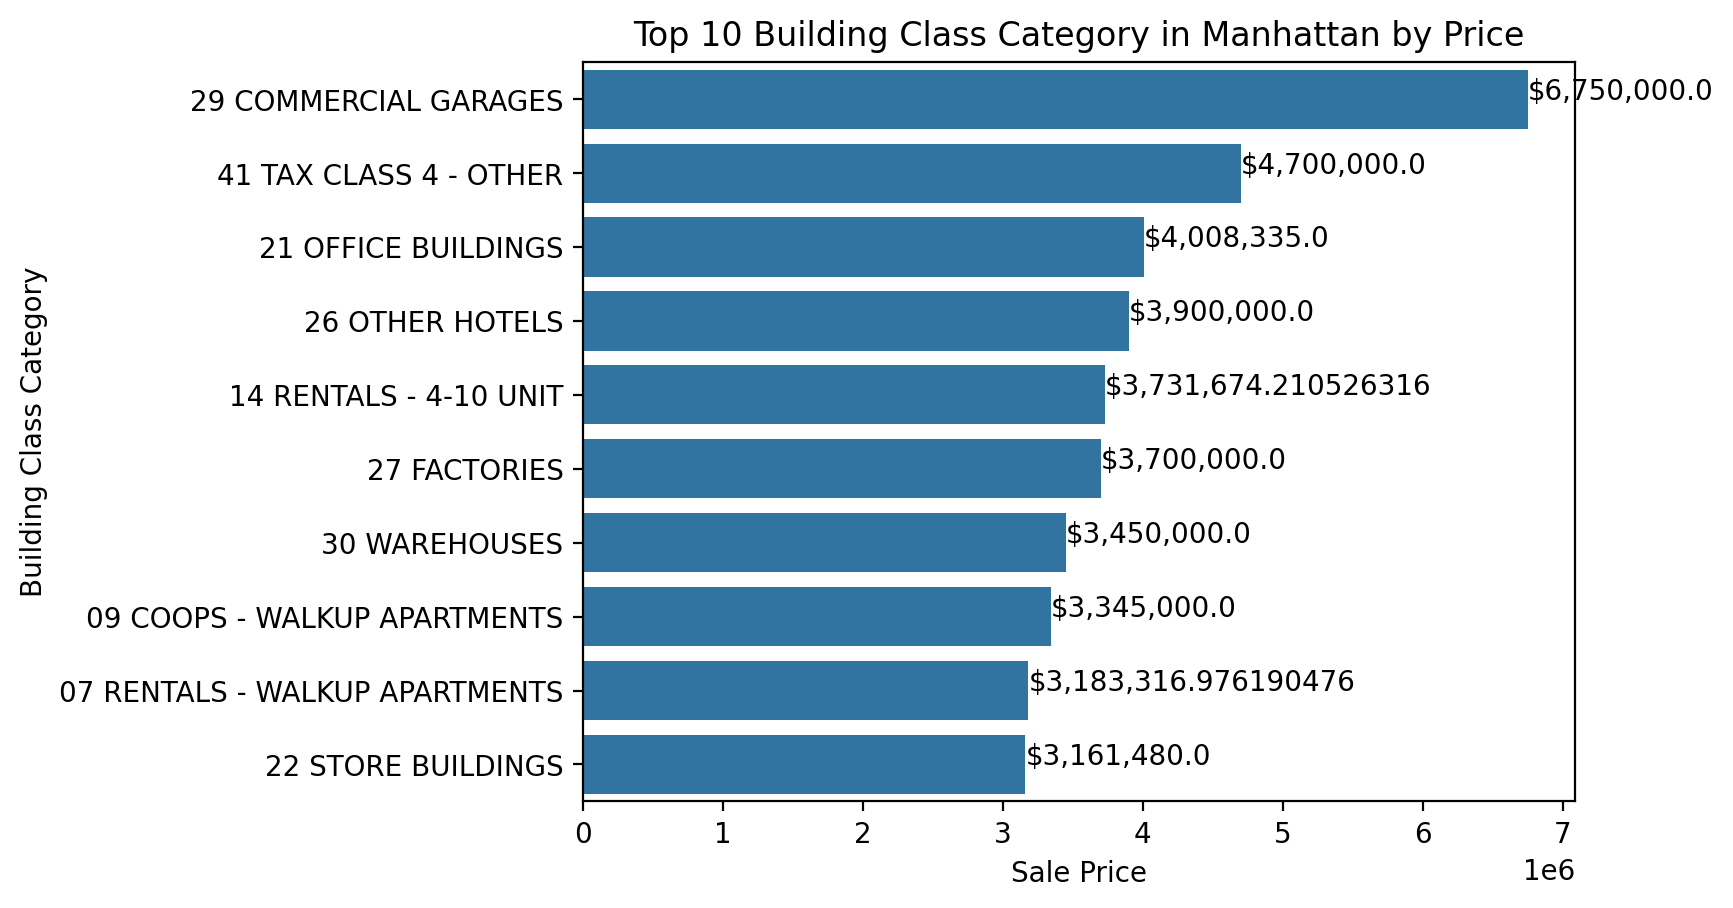

In [261]:
plot = sns.barplot(data = man_gr, y = "Building Class Category", x ="Sale Price")
for index, row in man_gr.iterrows():
    plot.text(row['Sale Price'], index, f"${row['Sale Price']:,}", color='black', ha="left")
plt.title("Top 10 Building Class Category in Manhattan by Price")
plt.show()

In [262]:
others_gr = others_df.groupby('Building Class Category')[['Sale Price']].mean().sort_values(by = 'Sale Price', ascending = False).reset_index().head(10)

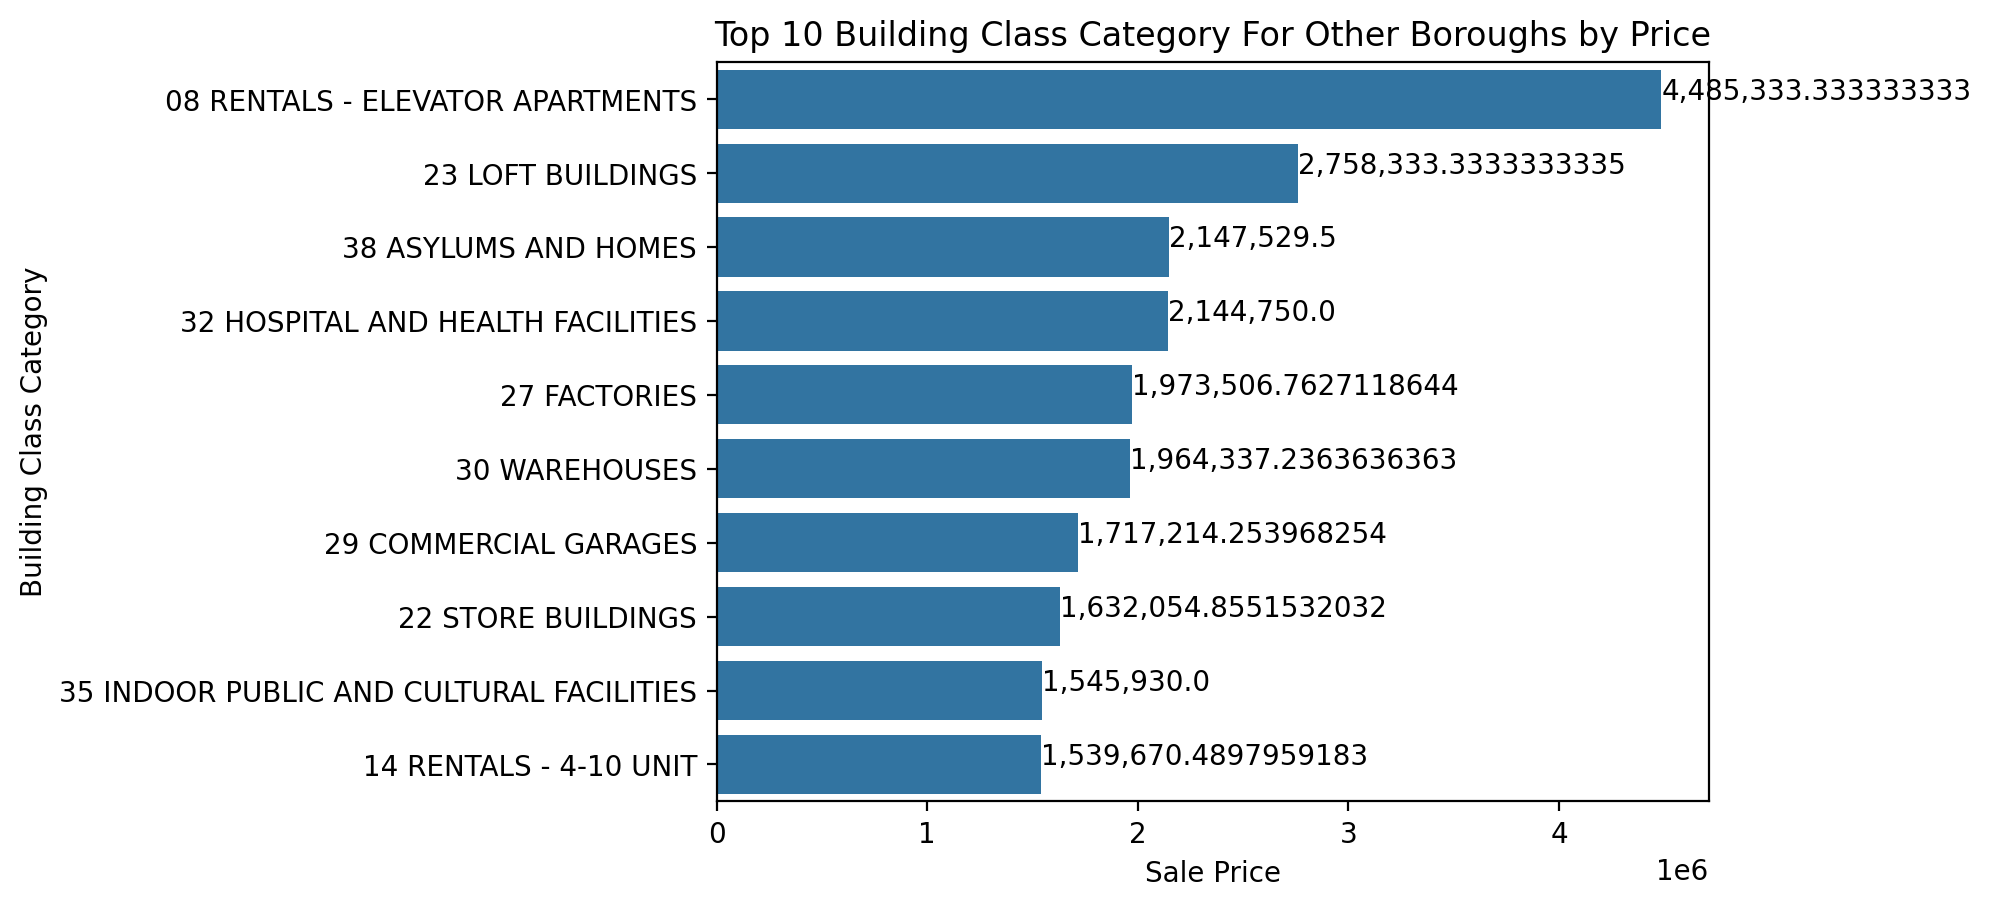

In [263]:
plot = sns.barplot(data = others_gr, y = "Building Class Category", x ="Sale Price")
for index, row in others_gr.iterrows():
    plot.text(row['Sale Price'], index, f"{row['Sale Price']:,}", color='black', ha="left")
plt.title("Top 10 Building Class Category For Other Boroughs by Price")
plt.show()

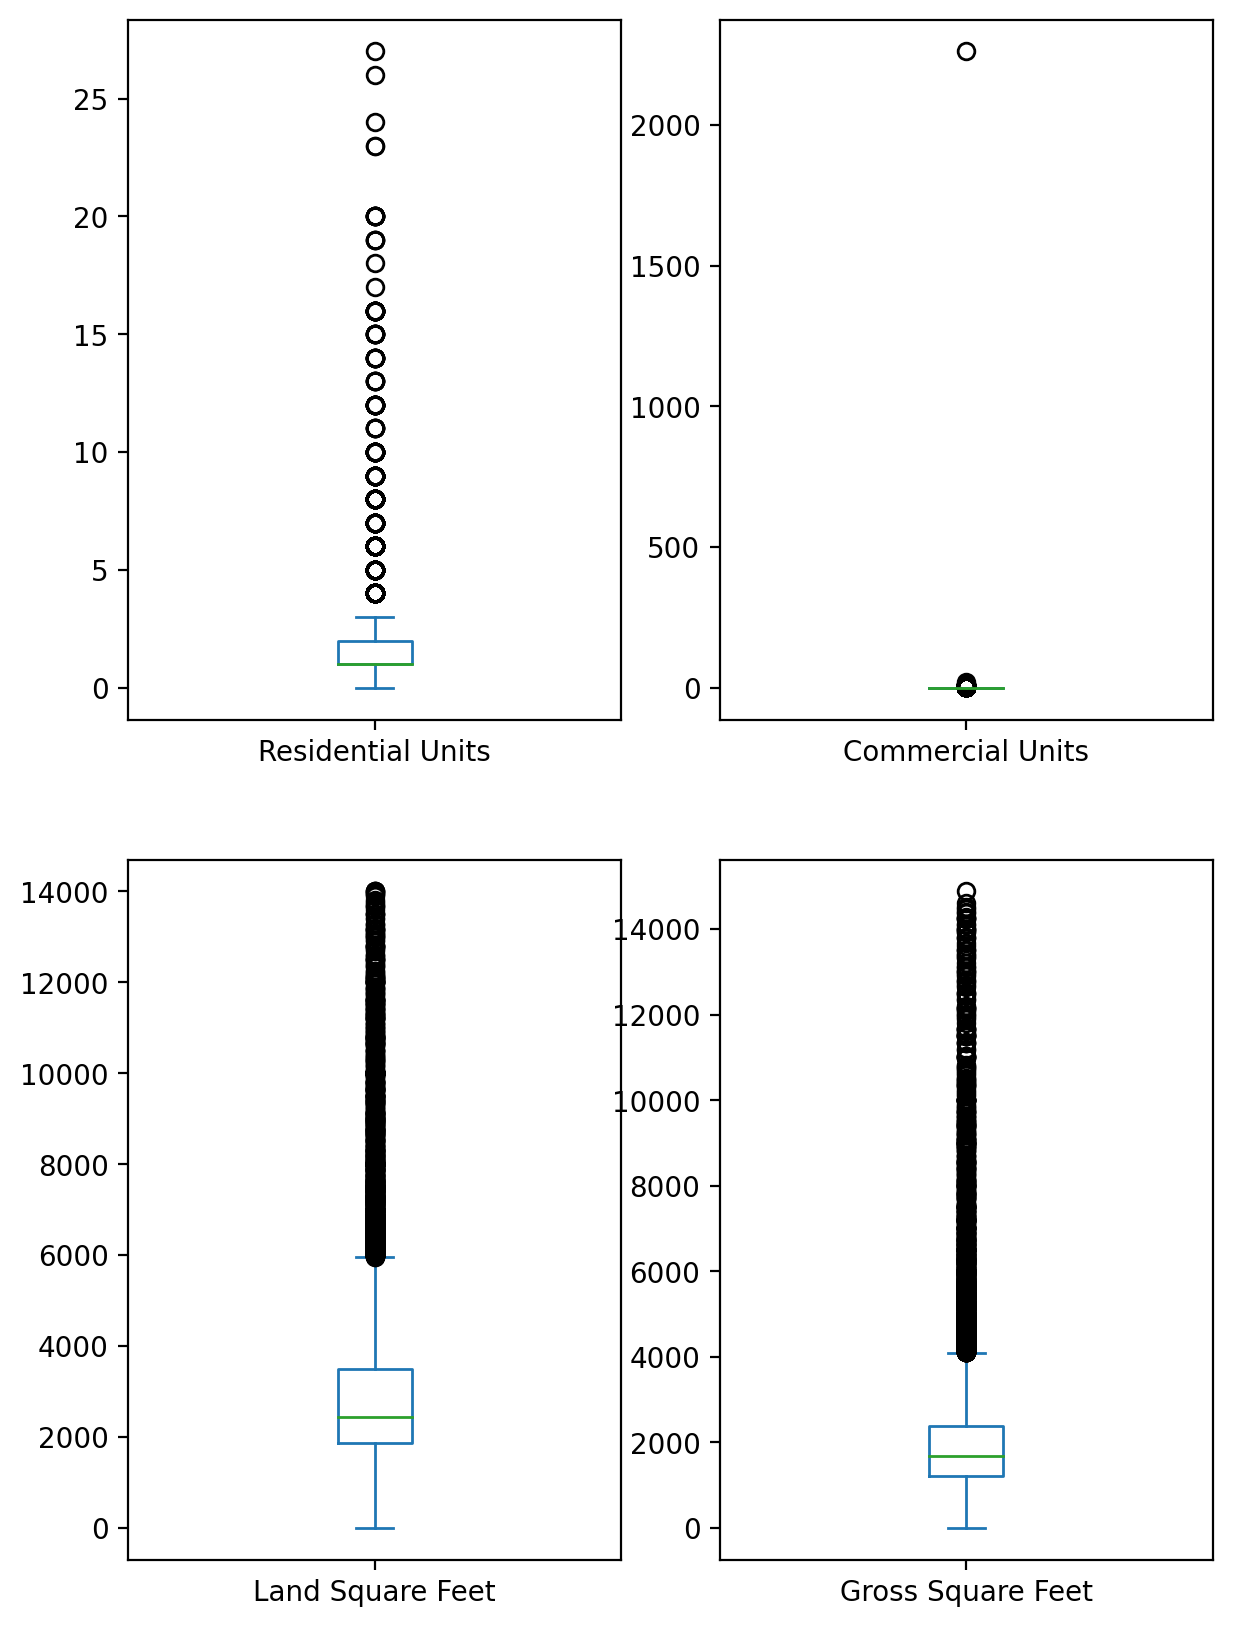

In [285]:
others_df[cols_man_df].plot(kind='box', subplots = True, layout=(2,2), figsize=(7,10))
plt.show()

In [265]:
top10_building_class = df.groupby('Building Class Category')[['Sale Price']].mean().sort_values(by = 'Sale Price', ascending = False).reset_index().head(10)

In [266]:
bt10_building_class = df.groupby('Building Class Category')[['Sale Price']].mean().sort_values(by = 'Sale Price', ascending = True).reset_index().head(10)

In [267]:
bt10_building_class

Building Class Category  Sale Price
0  40 SELECTED GOVERNMENTAL FACILITIES        1.00
1            43 CONDO OFFICE BUILDINGS    20000.00
2                     44 CONDO PARKING    72790.00
3                 28 COMMERCIAL CONDOS   313545.50
4               06 TAX CLASS 1 - OTHER   489530.91
5       10 COOPS - ELEVATOR APARTMENTS   550000.00
6              01 ONE FAMILY DWELLINGS   606001.16
7        12 CONDOS - WALKUP APARTMENTS   663388.86
8              02 TWO FAMILY DWELLINGS   749075.39
9                04 TAX CLASS 1 CONDOS   753857.52

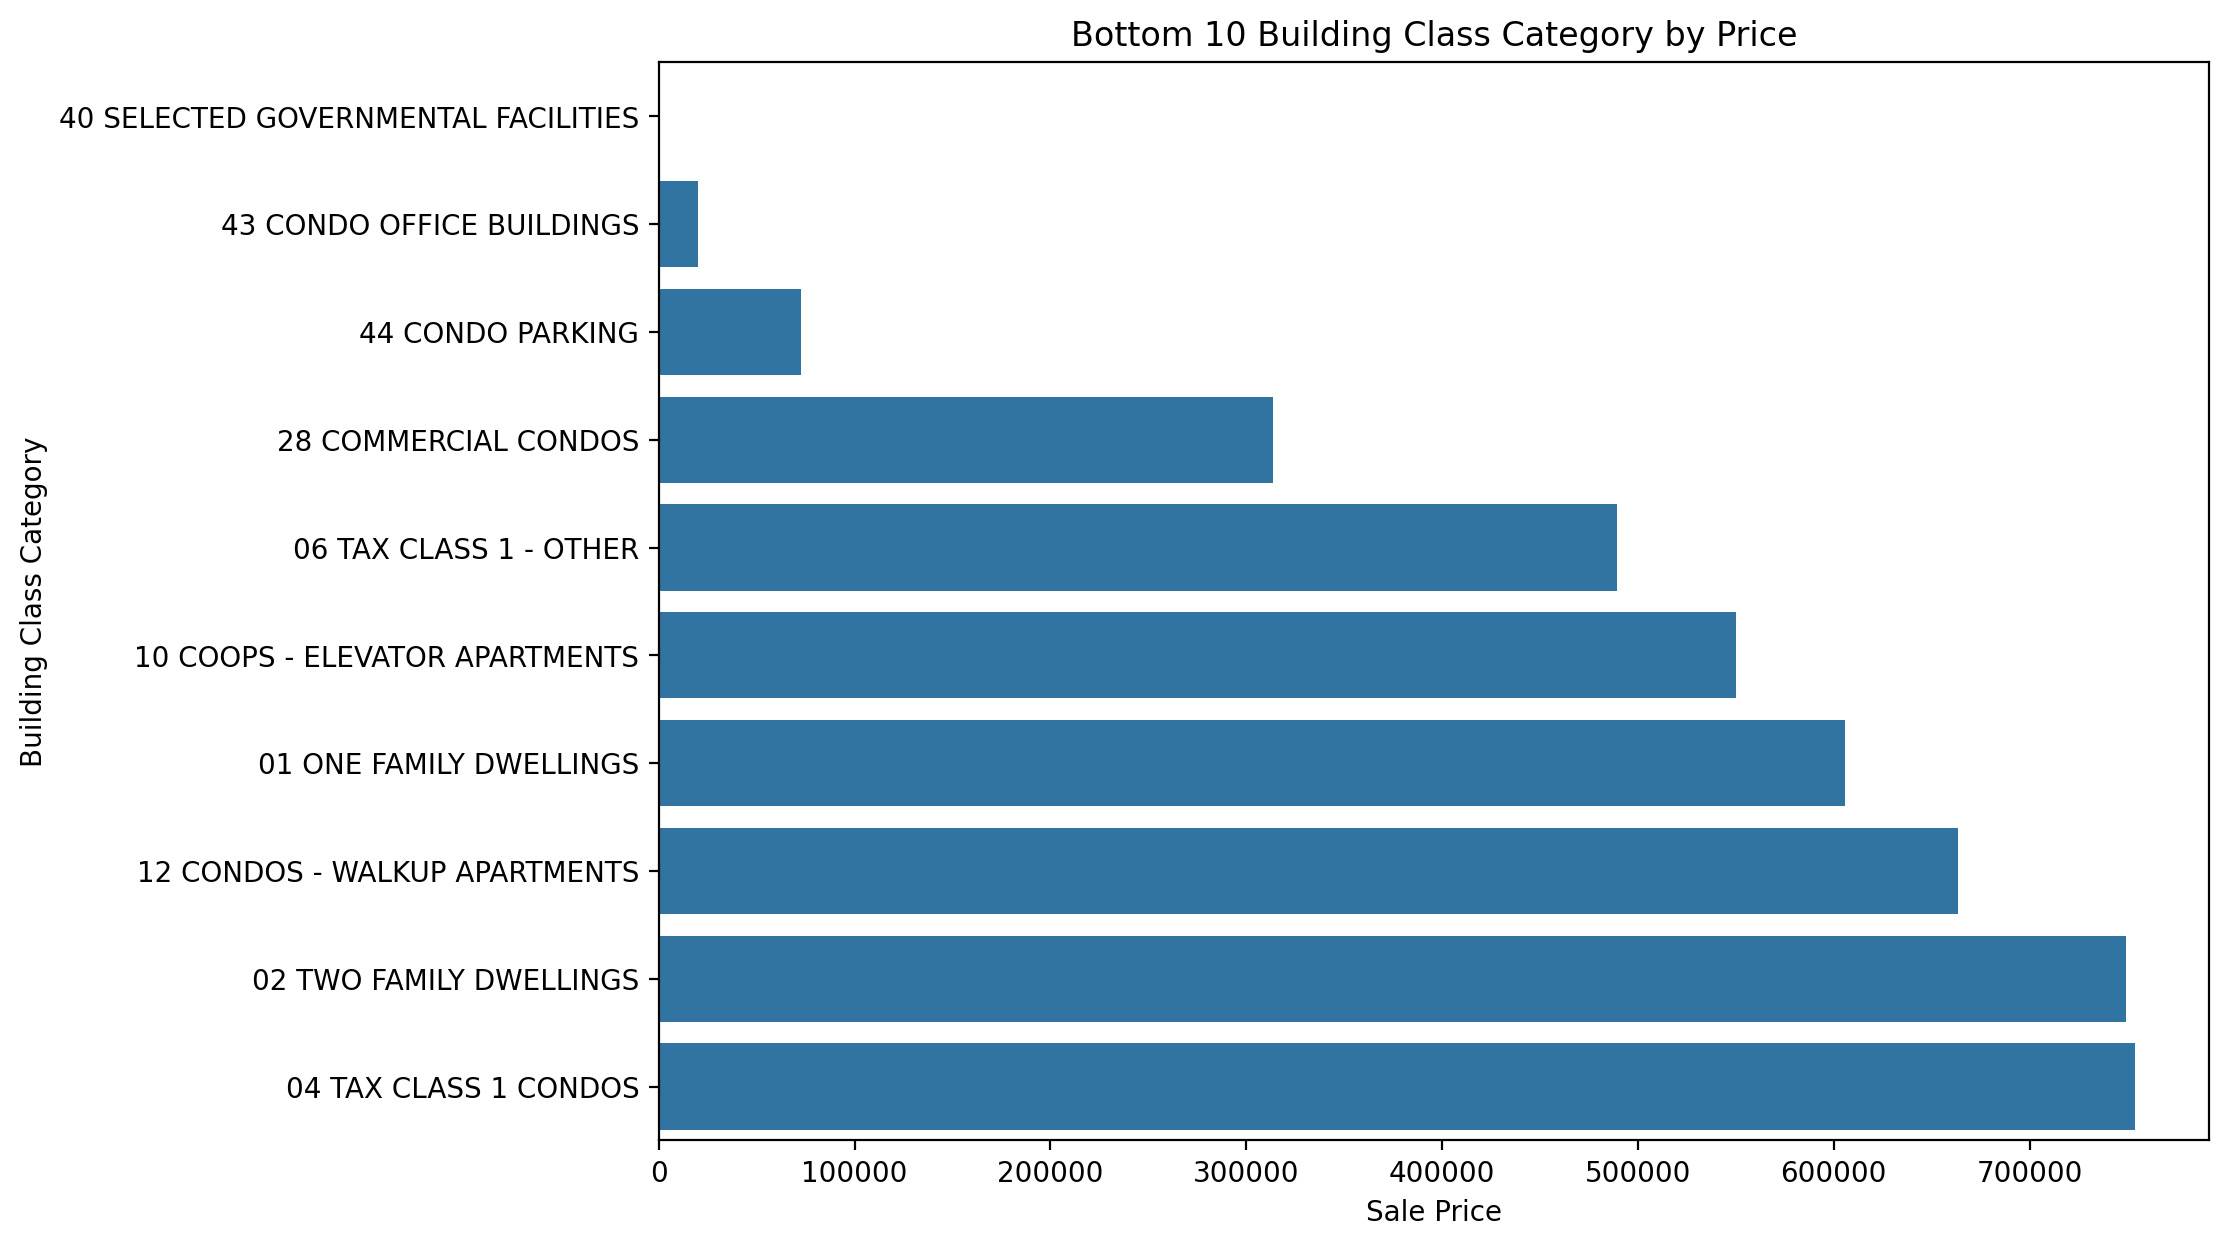

In [268]:
plt.figure(figsize=(10,7))
sns.barplot(data = bt10_building_class, y = "Building Class Category", x ="Sale Price")
plt.title("Bottom 10 Building Class Category by Price")
plt.show()

In [269]:
top10_building_class

Building Class Category  Sale Price
0   08 RENTALS - ELEVATOR APARTMENTS  4485333.33
1       09 COOPS - WALKUP APARTMENTS  3345000.00
2                  23 LOFT BUILDINGS  2754166.83
3               38 ASYLUMS AND HOMES  2147529.50
4  32 HOSPITAL AND HEALTH FACILITIES  2144750.00
5                    26 OTHER HOTELS  2135000.00
6                       27 FACTORIES  2002281.65
7                      30 WAREHOUSES  1977721.59
8              29 COMMERCIAL GARAGES  1756842.49
9            37 RELIGIOUS FACILITIES  1751953.21

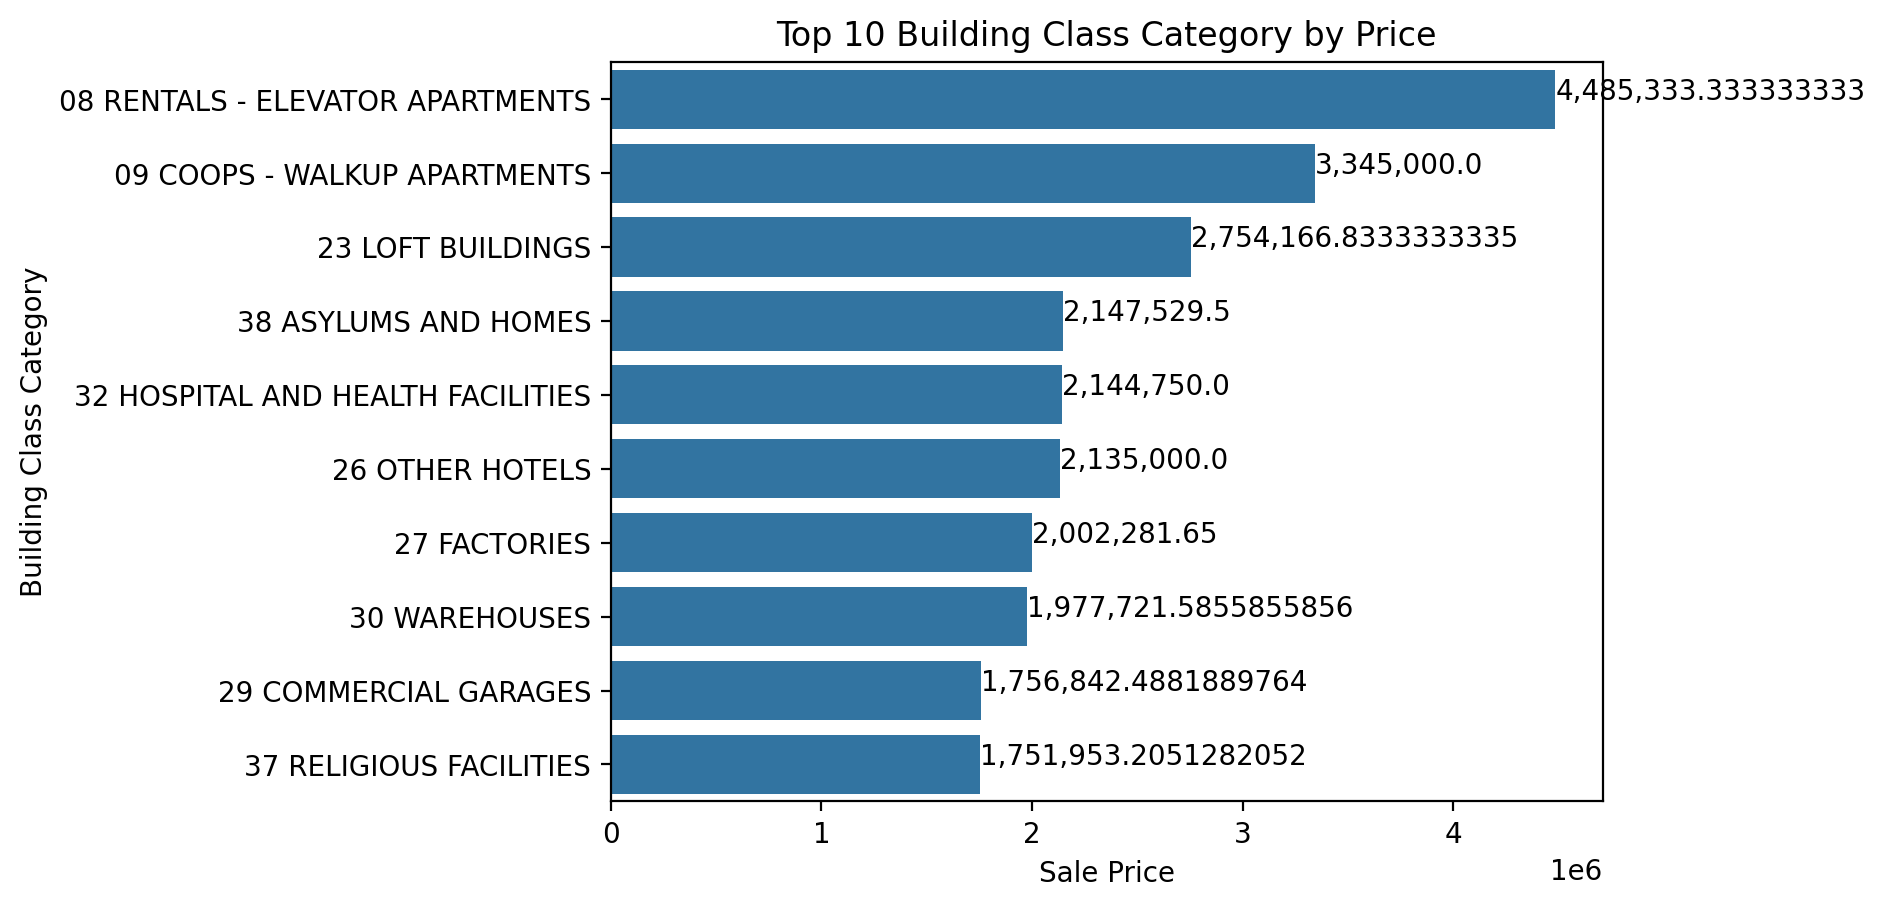

In [270]:
plot = sns.barplot(data = top10_building_class, y = "Building Class Category", x ="Sale Price")
for index, row in top10_building_class.iterrows():
    plot.text(row['Sale Price'], index, f"{row['Sale Price']:,}", color='black', ha="left")
plt.title("Top 10 Building Class Category by Price")
plt.show()

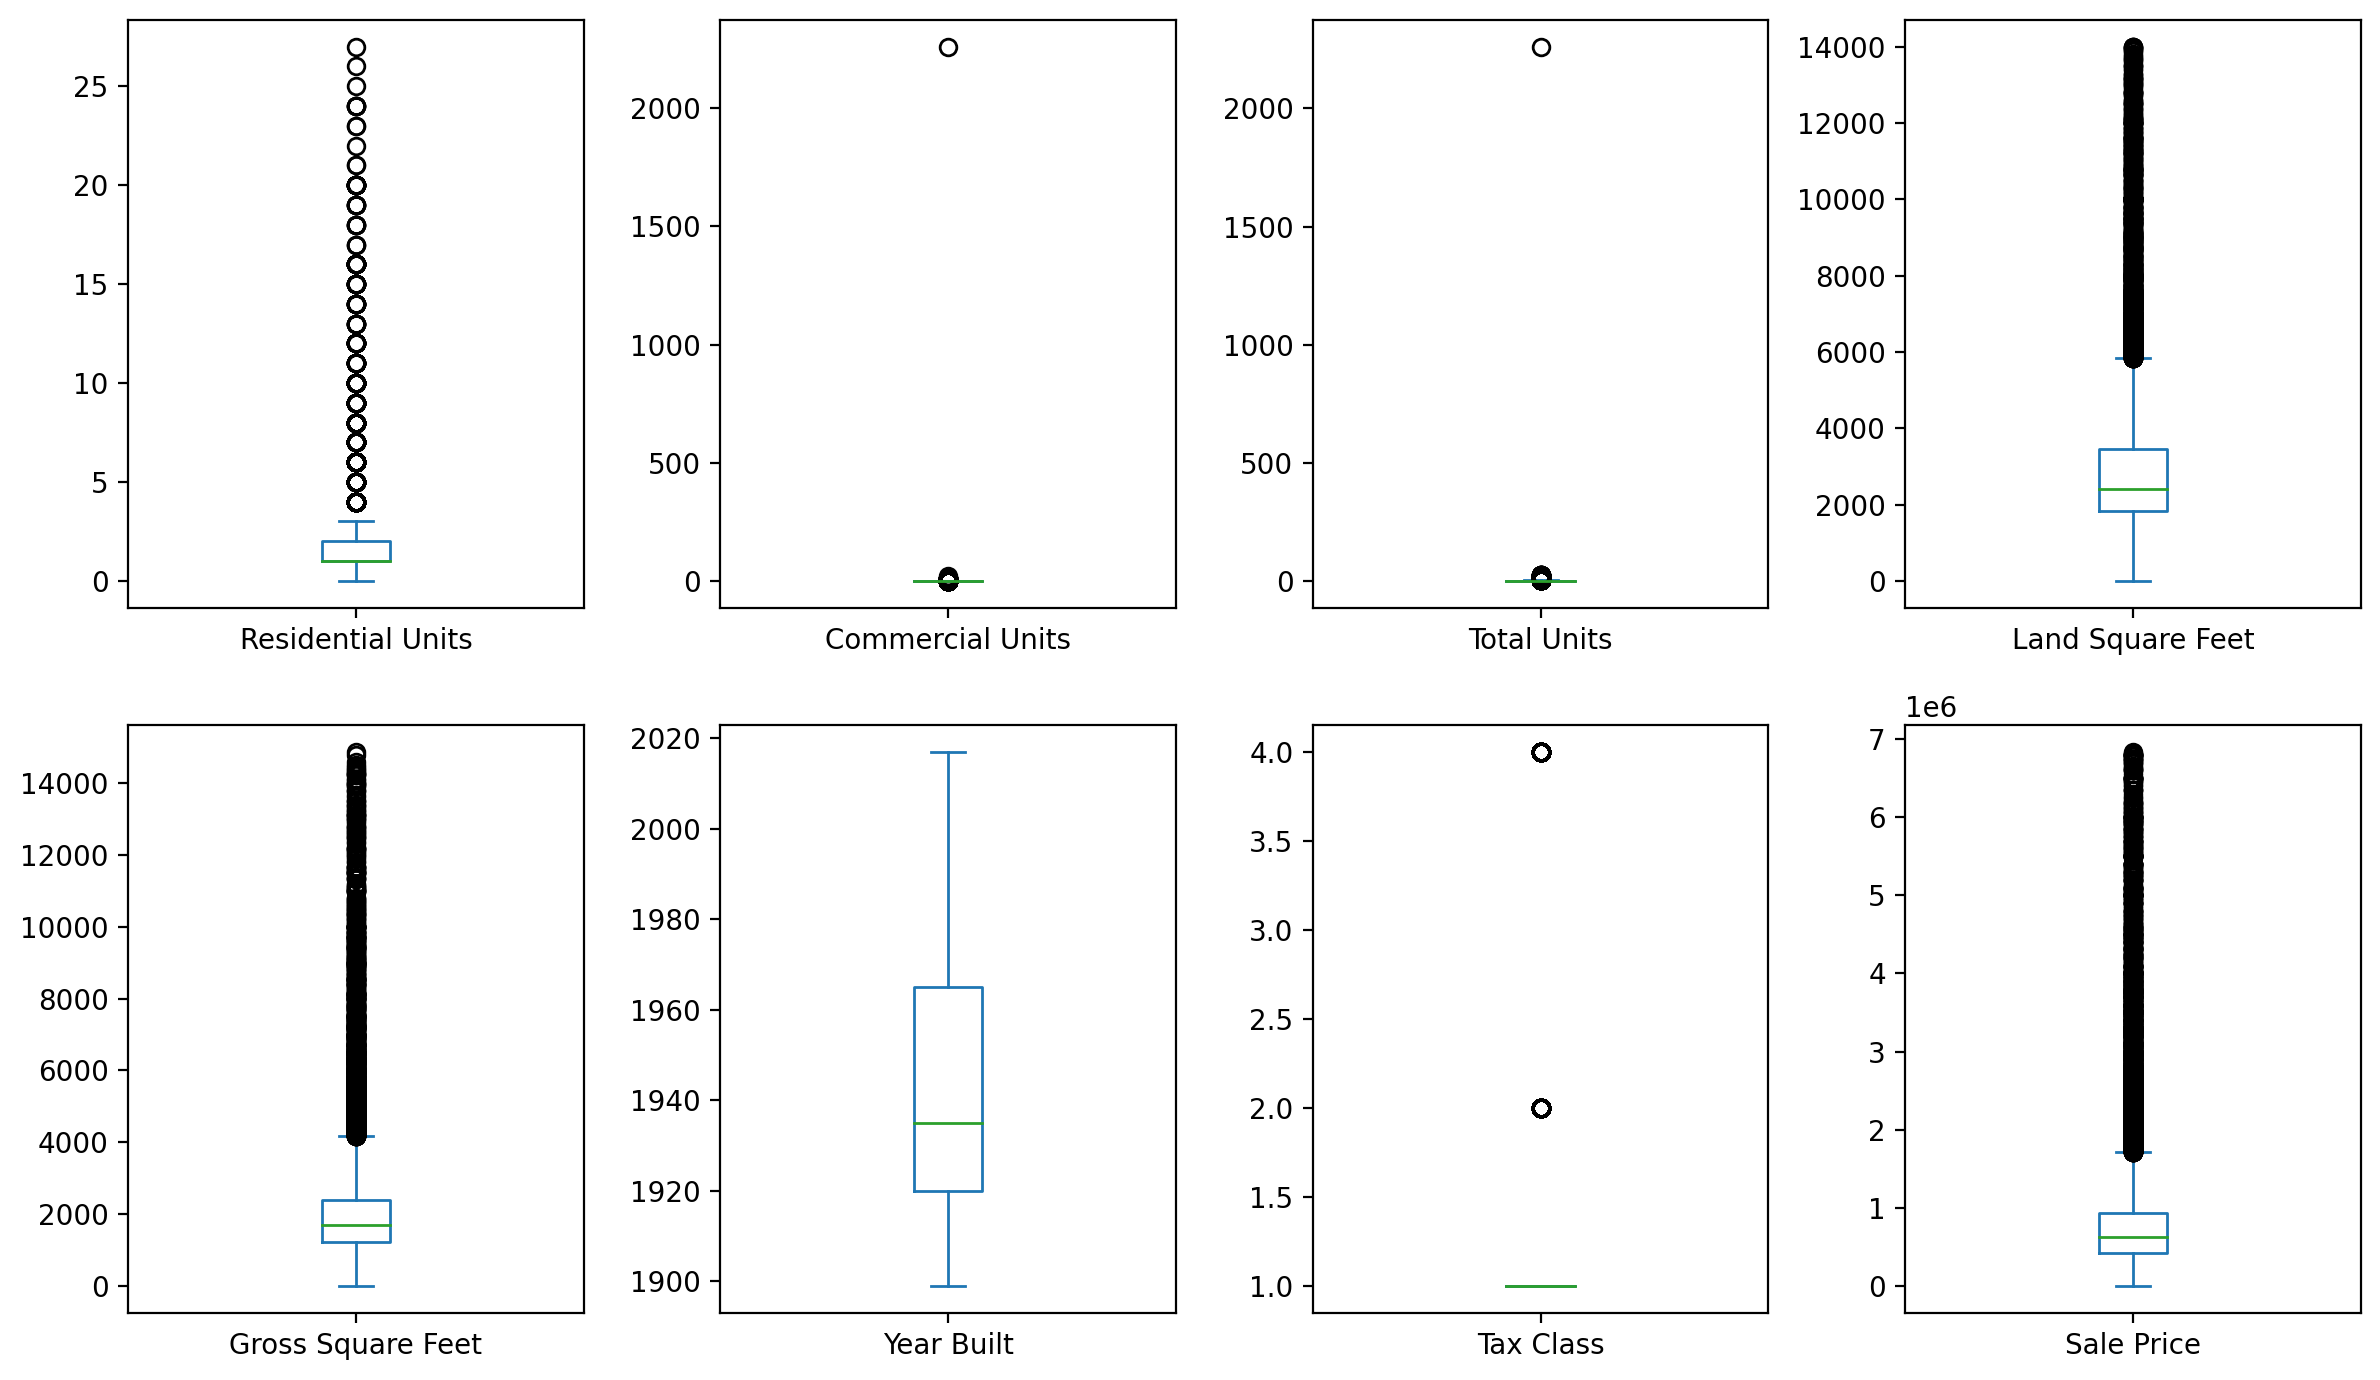

In [271]:
numeric_columns = df.select_dtypes('number').columns
df[numeric_columns].plot(kind = 'box', subplots = True, layout=(2,4), figsize=(12,7))
plt.tight_layout()
plt.subplots_adjust(wspace=0.30, hspace=0.2)
plt.show()

In [272]:
df.head()

Borough         Building Class Category  Residential Units  \
0  Manhattan  07 RENTALS - WALKUP APARTMENTS                  5   
1  Manhattan  07 RENTALS - WALKUP APARTMENTS                 10   
3  Manhattan  07 RENTALS - WALKUP APARTMENTS                  8   
7  Manhattan          14 RENTALS - 4-10 UNIT                  3   
9  Manhattan          14 RENTALS - 4-10 UNIT                  5   

   Commercial Units  Total Units  Land Square Feet  Gross Square Feet  \
0                 0            5              1633               6440   
1                 0           10              2272               6794   
3                 0            8              1750               4226   
7                 1            4              1520               3360   
9                 1            6              1779               3713   

   Year Built  Tax Class  Sale Price  Sale Date Sale Month Sale Season  
0        1900          2     6625000 2017-07-19       July      Summer  
1        1913          2     3936272 2016-09-23  September      Autumn  
3        1920          2     3192840 2016-09-23  September      Autumn  
7        1910          2     3300000 2016-11-15   November      Autumn  
9        1910          2     4750000 2017-04-03      April      Spring

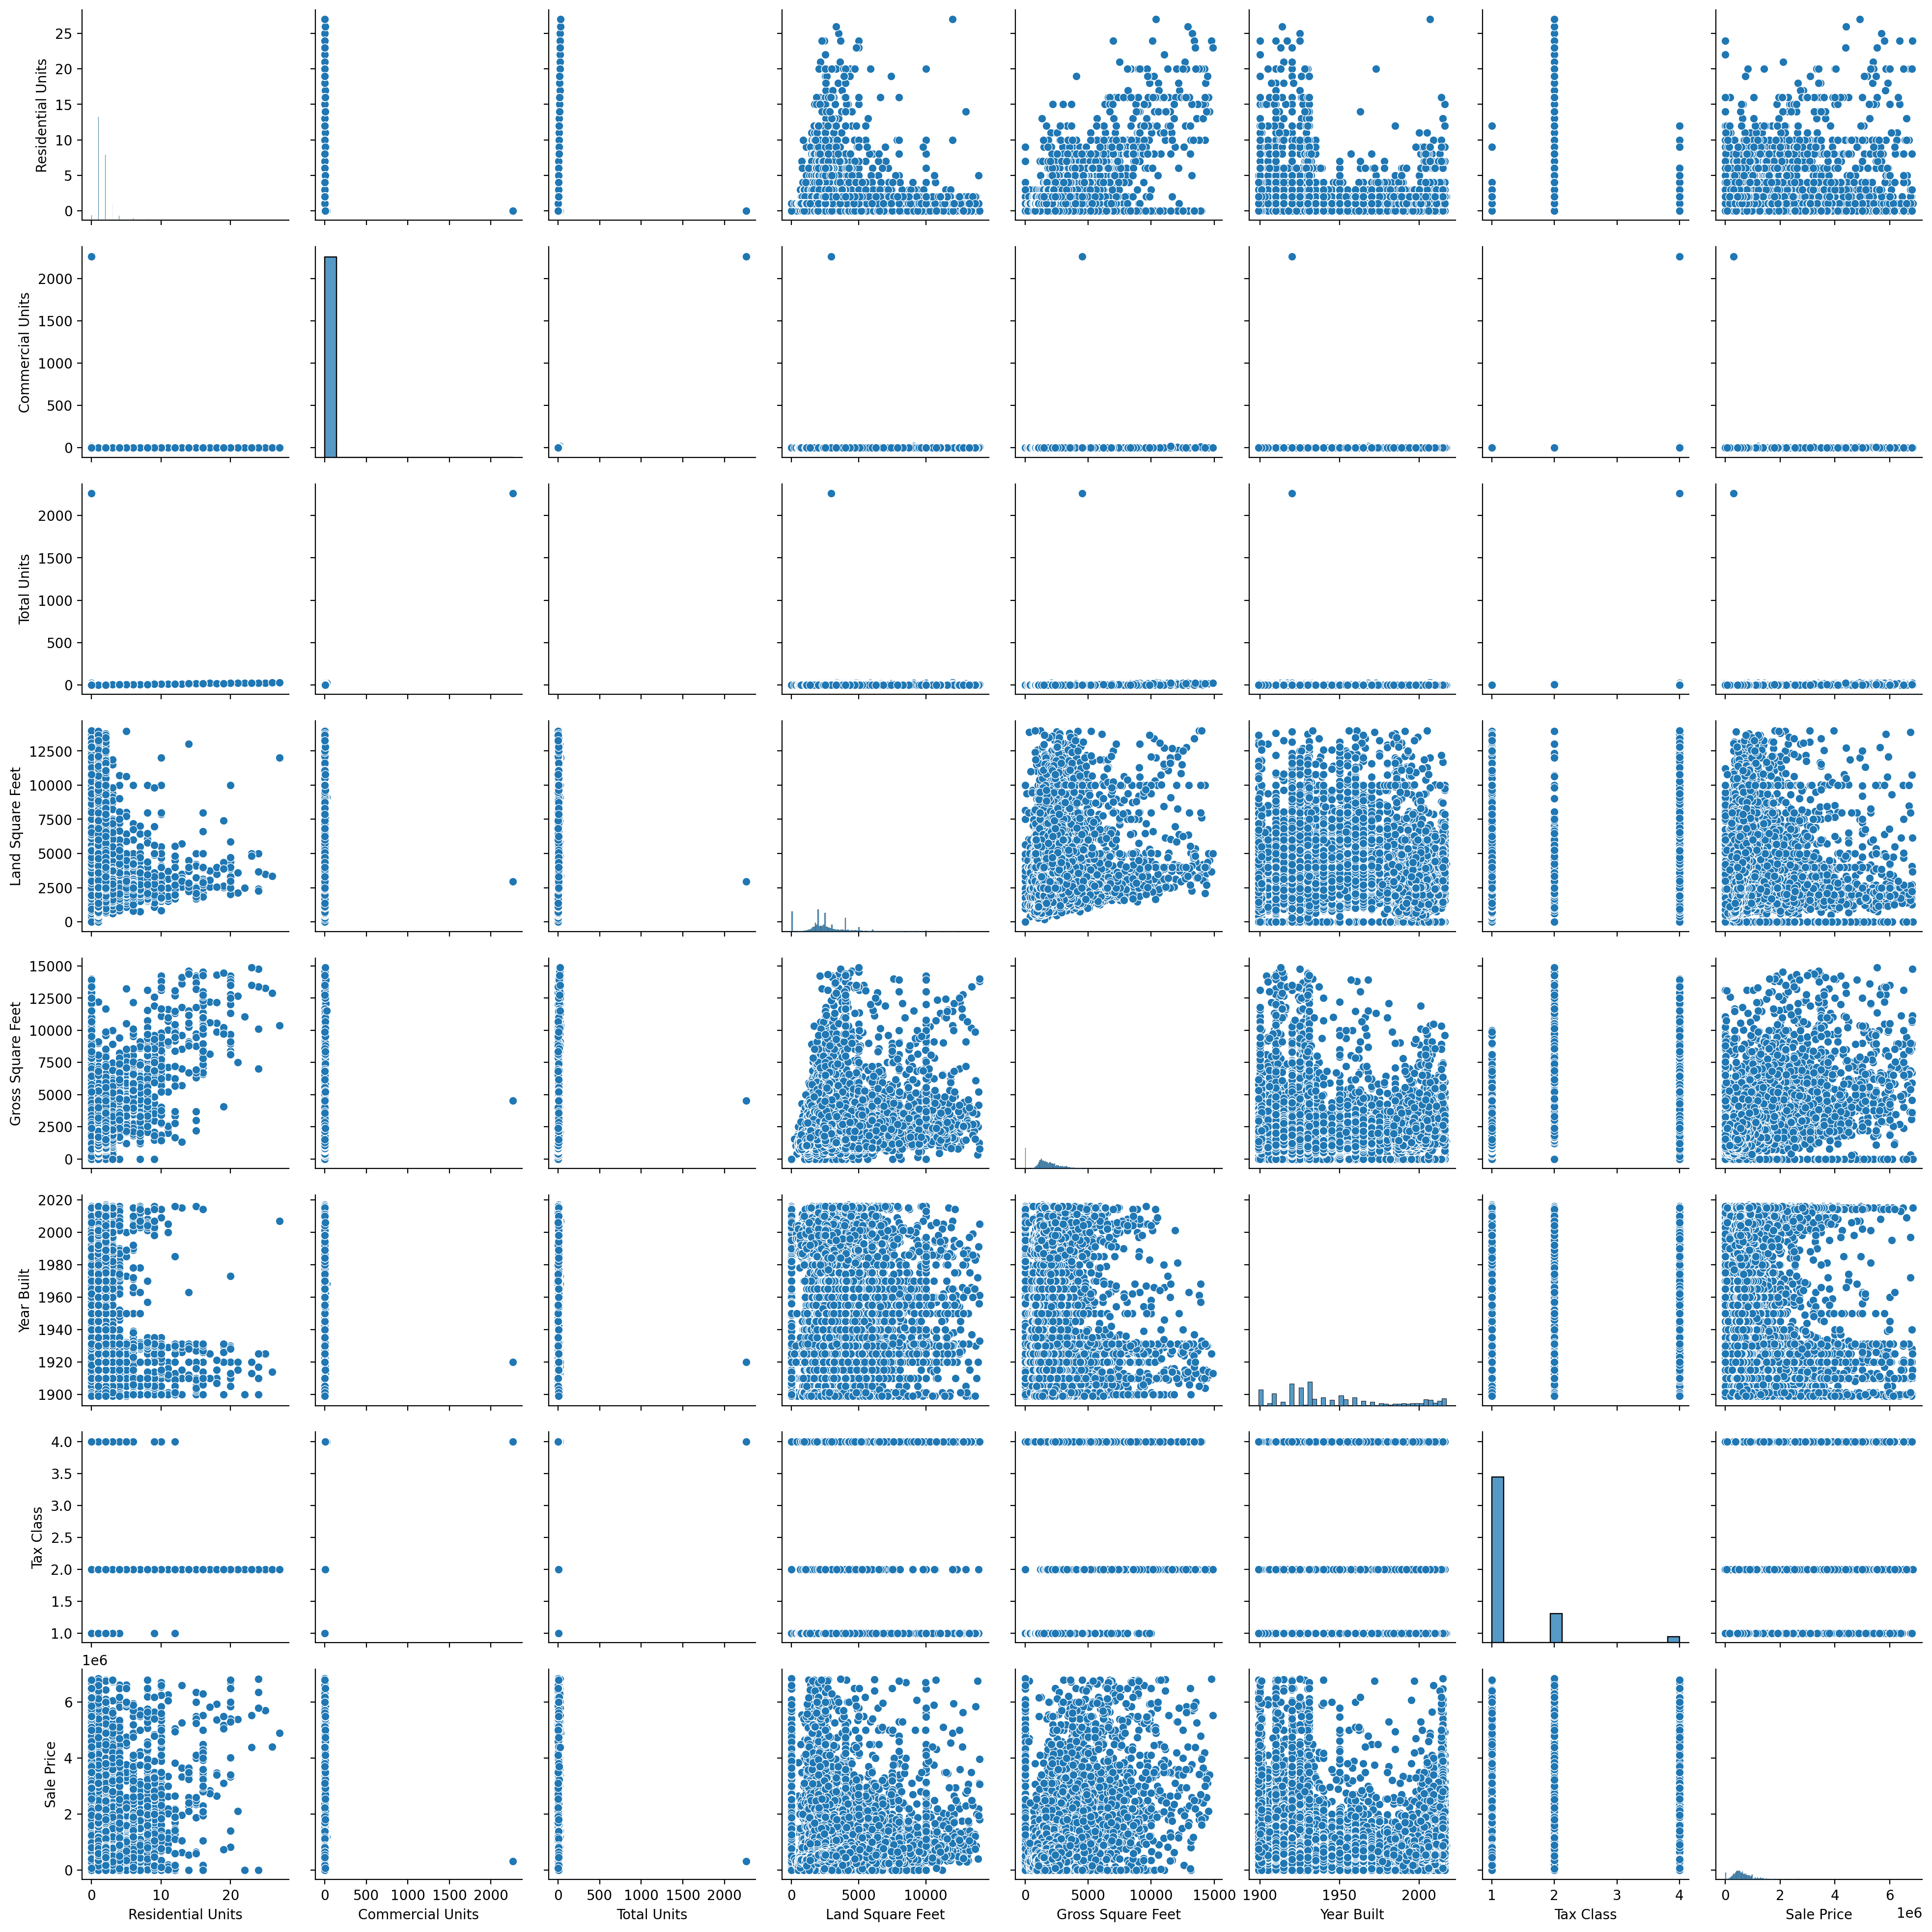

In [273]:
sns.pairplot(df[numeric_columns])

In [274]:
df['Sale Price'].describe()

count     31107.00
mean     821081.16
std      771430.36
min           1.00
25%      425000.00
50%      625000.00
75%      939000.00
max     6838414.00
Name: Sale Price, dtype: float64

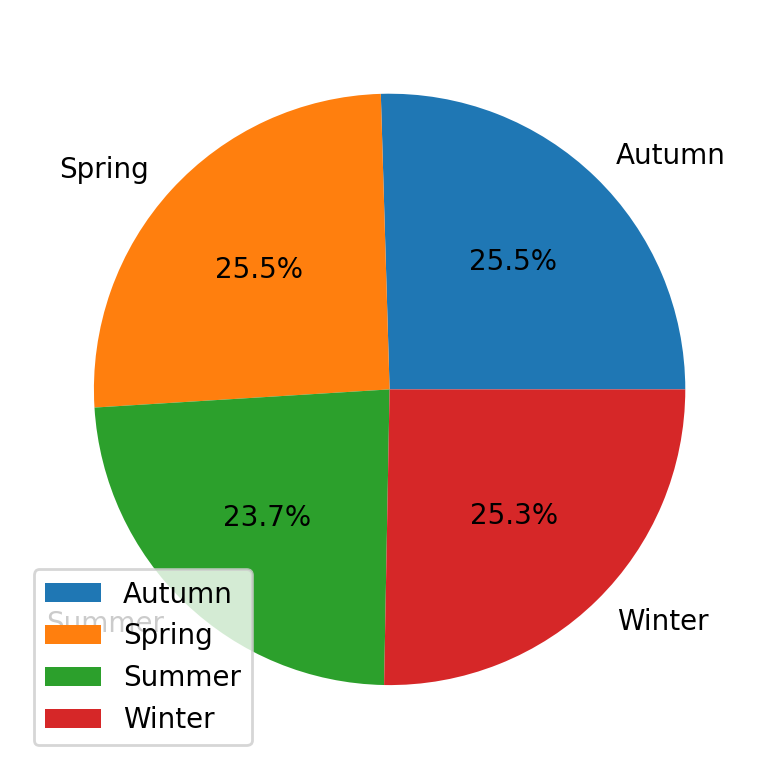

In [275]:
plt.pie(df.groupby('Sale Season')['Sale Price'].count().reset_index()['Sale Price'],autopct='%1.1f%%', labels = ['Autumn','Spring','Summer','Winter'])
plt.legend()
plt.show()

In [276]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']

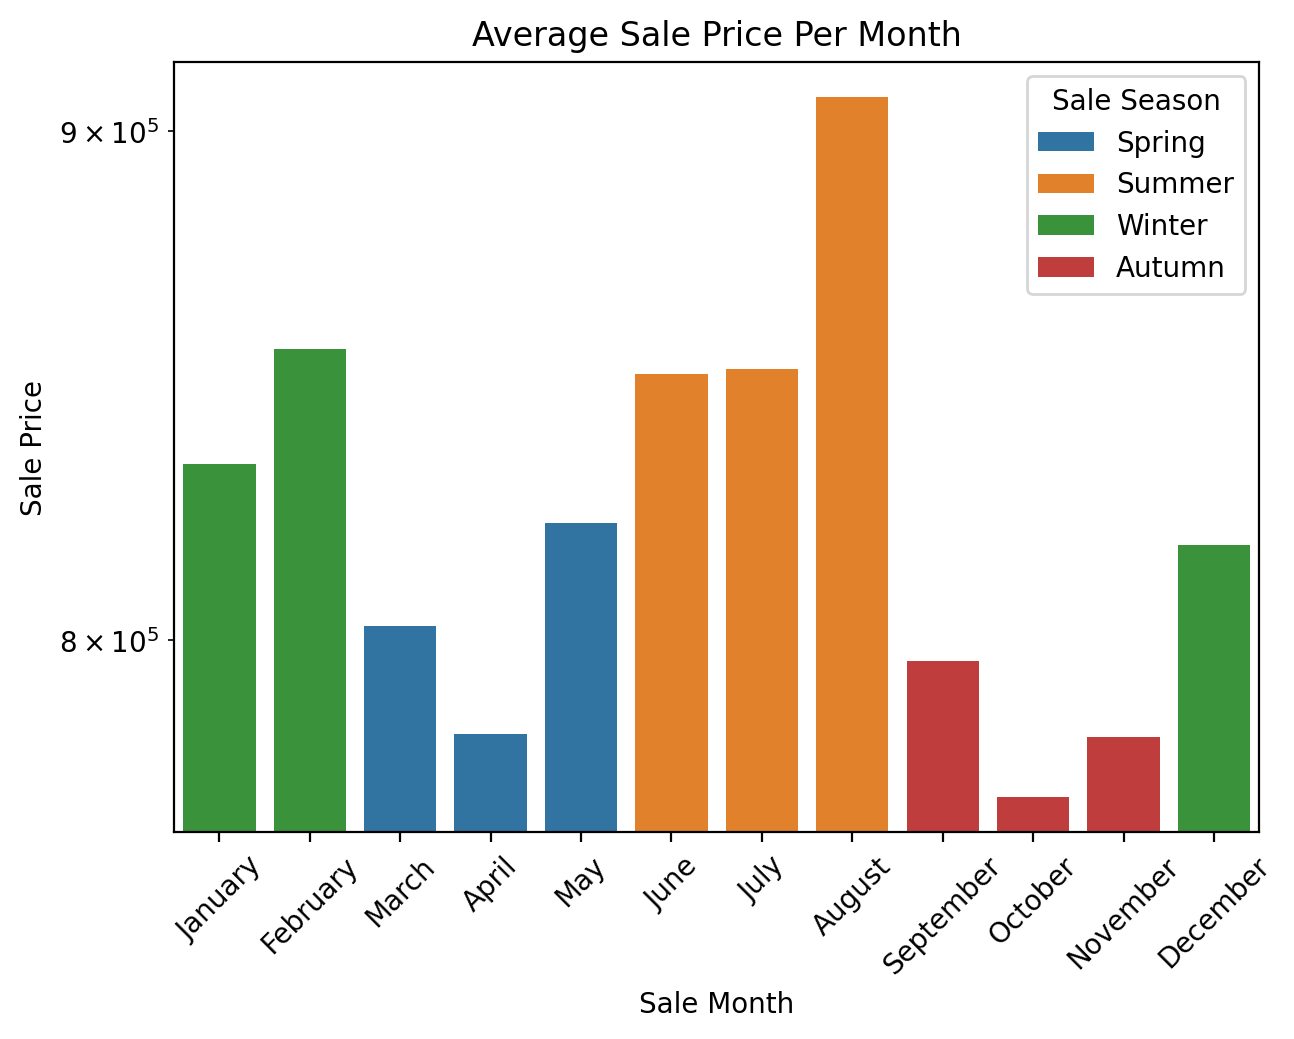

In [277]:
plt.figure(figsize = (7,5))
ax = sns.barplot(data =df.groupby(['Sale Month','Sale Season'], as_index = False)['Sale Price'].mean().reset_index(), x = 'Sale Month', y ='Sale Price',ci=None,order = month_order,hue='Sale Season')
plt.title("Average Sale Price Per Month")
plt.yscale('log')
plt.xticks(rotation= 45)
plt.show()

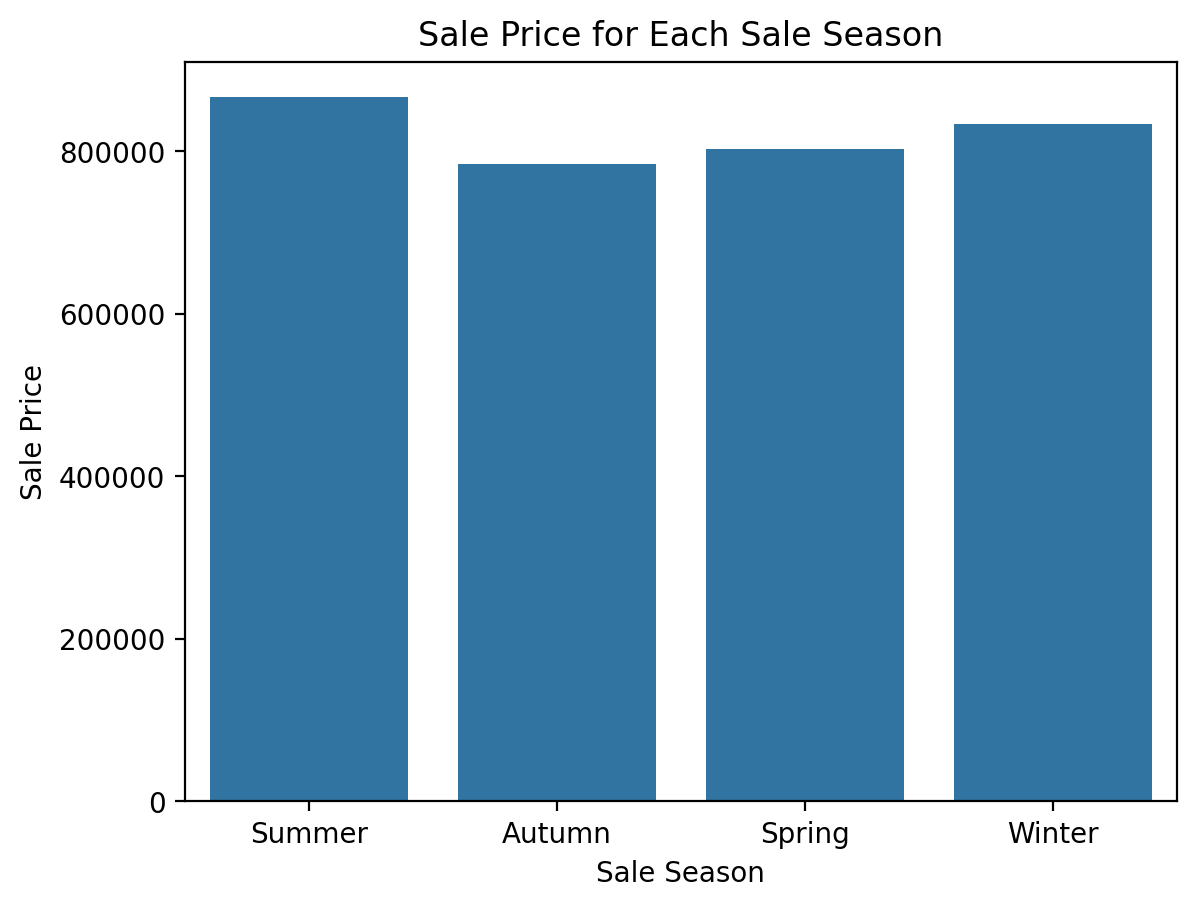

In [300]:
ax = sns.barplot(data = df, x ='Sale Season',y="Sale Price",ci = None,estimator = 'mean')
y_vals = ax.get_yticks()

# Format y-axis ticks as non-scientific notation
ax.set_yticklabels(['{:.0f}'.format(y) for y in y_vals])
plt.title('Sale Price for Each Sale Season')
plt.show()

In [279]:
cols = ['Land Square Feet','Gross Square Feet']

Text(0.5, 1.0, 'Sale Price against Land Square Feet')

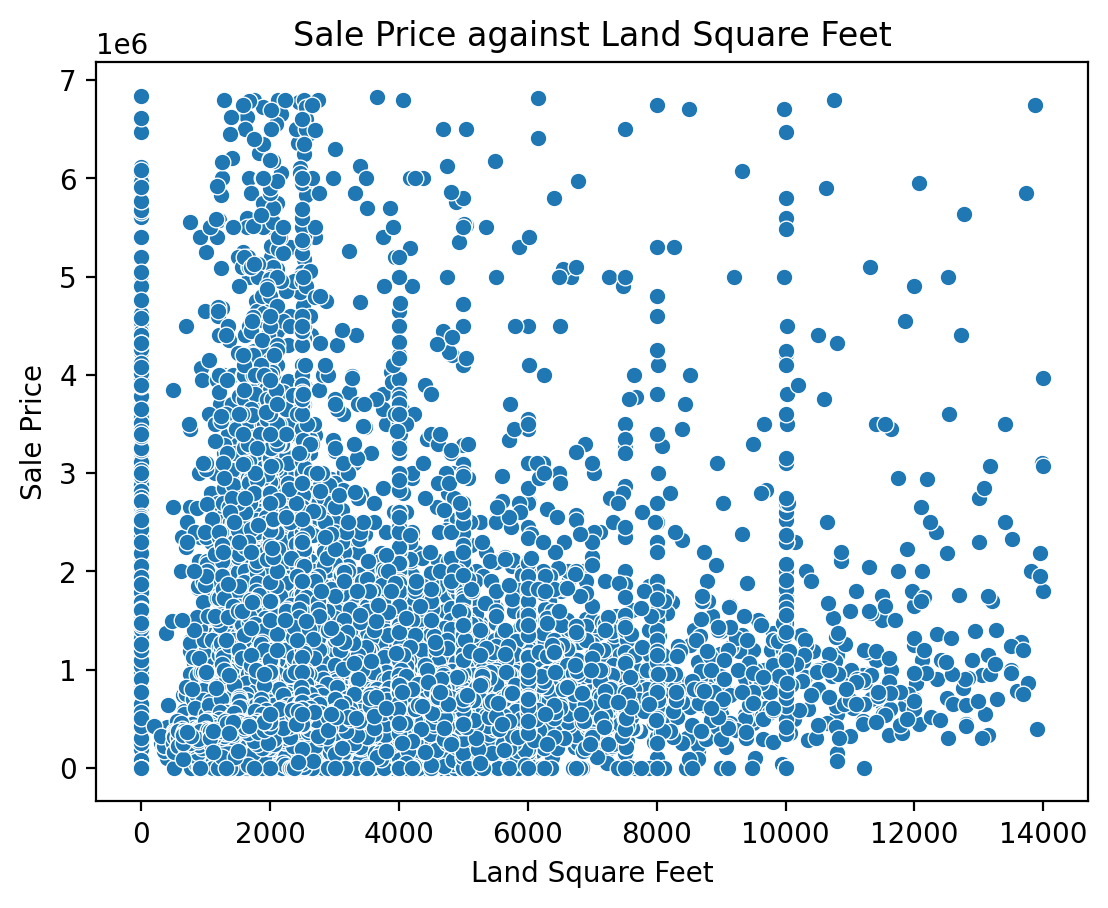

In [299]:
sns.scatterplot(data=df, x ='Land Square Feet',y ='Sale Price')
plt.title('Sale Price against Land Square Feet')

Text(0.5, 1.0, 'Sale Price against Gross Square Feet')

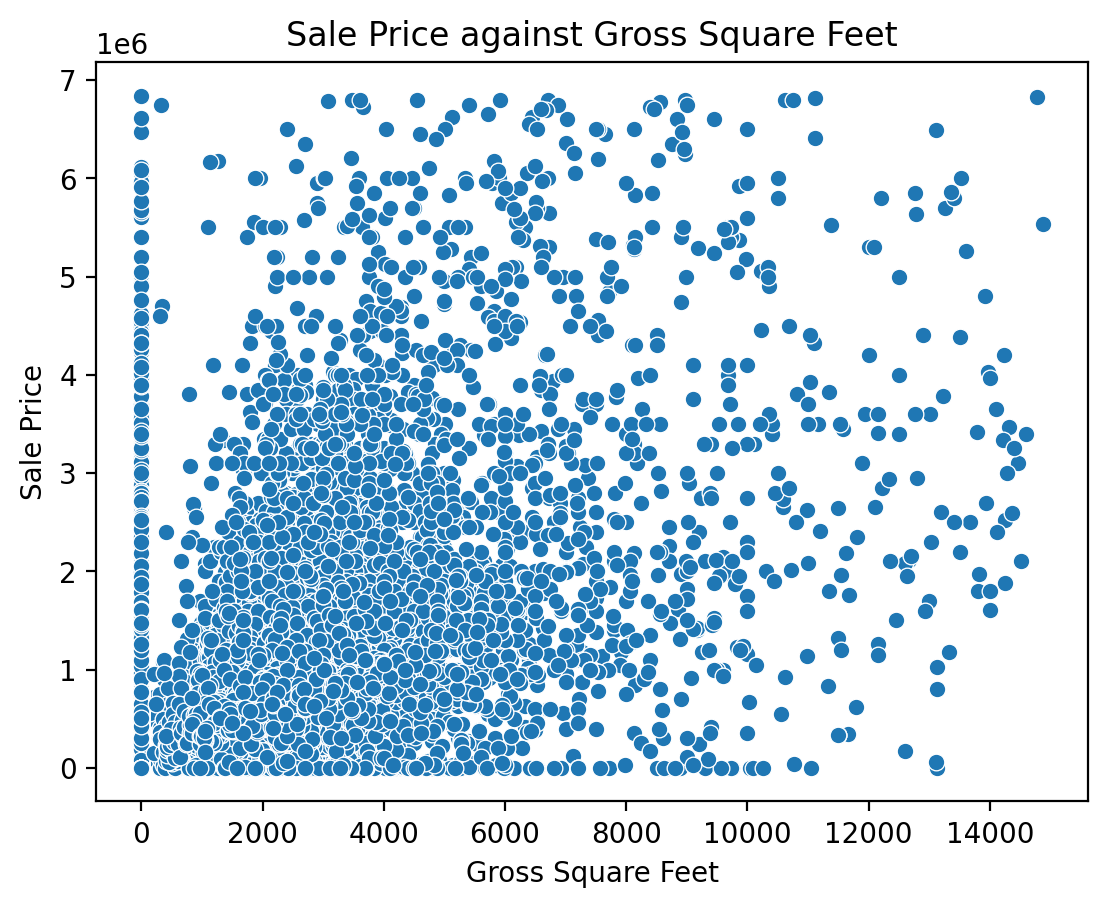

In [298]:
sns.scatterplot(data=df, x ='Gross Square Feet',y ='Sale Price')
plt.title('Sale Price against Gross Square Feet')

<Axes: xlabel='Year Built', ylabel='Sale Price'>

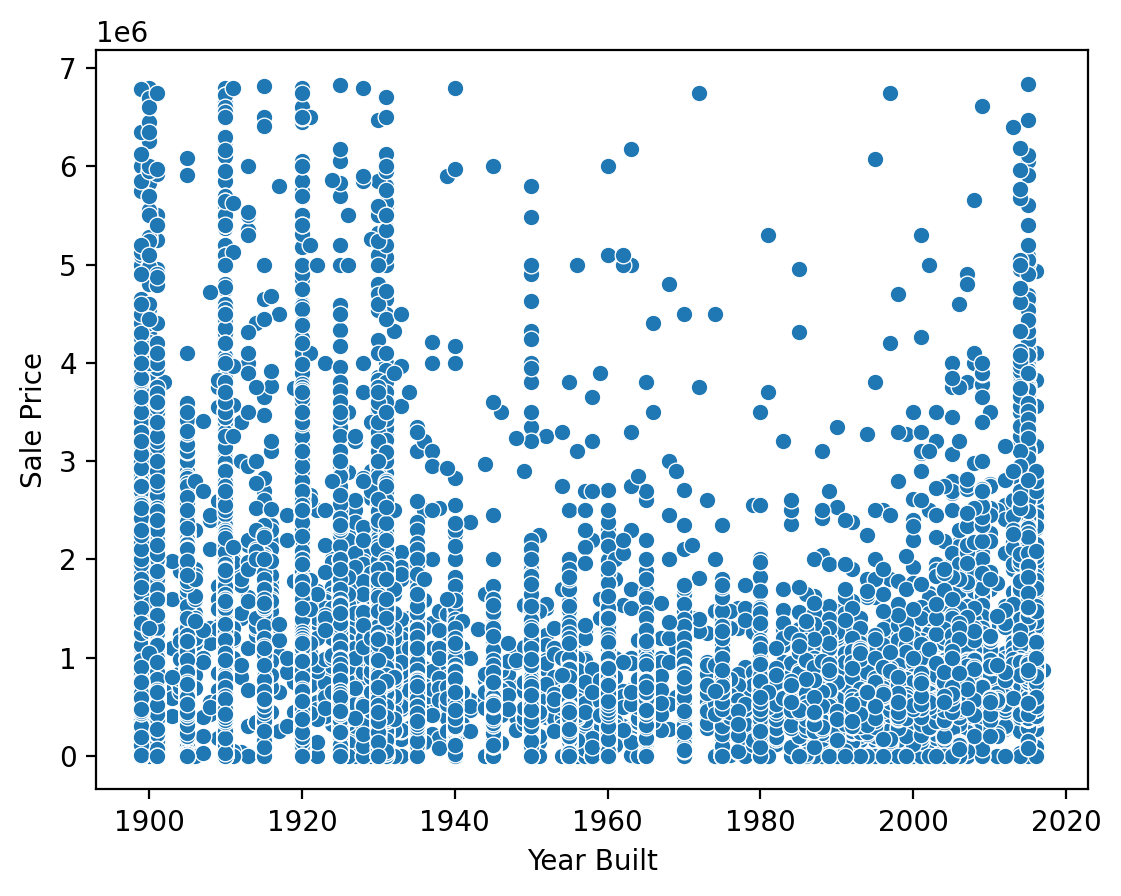

In [282]:
sns.scatterplot(data = df, x = 'Year Built', y ='Sale Price')

Text(0.5, 1.0, 'Tax Class Count')

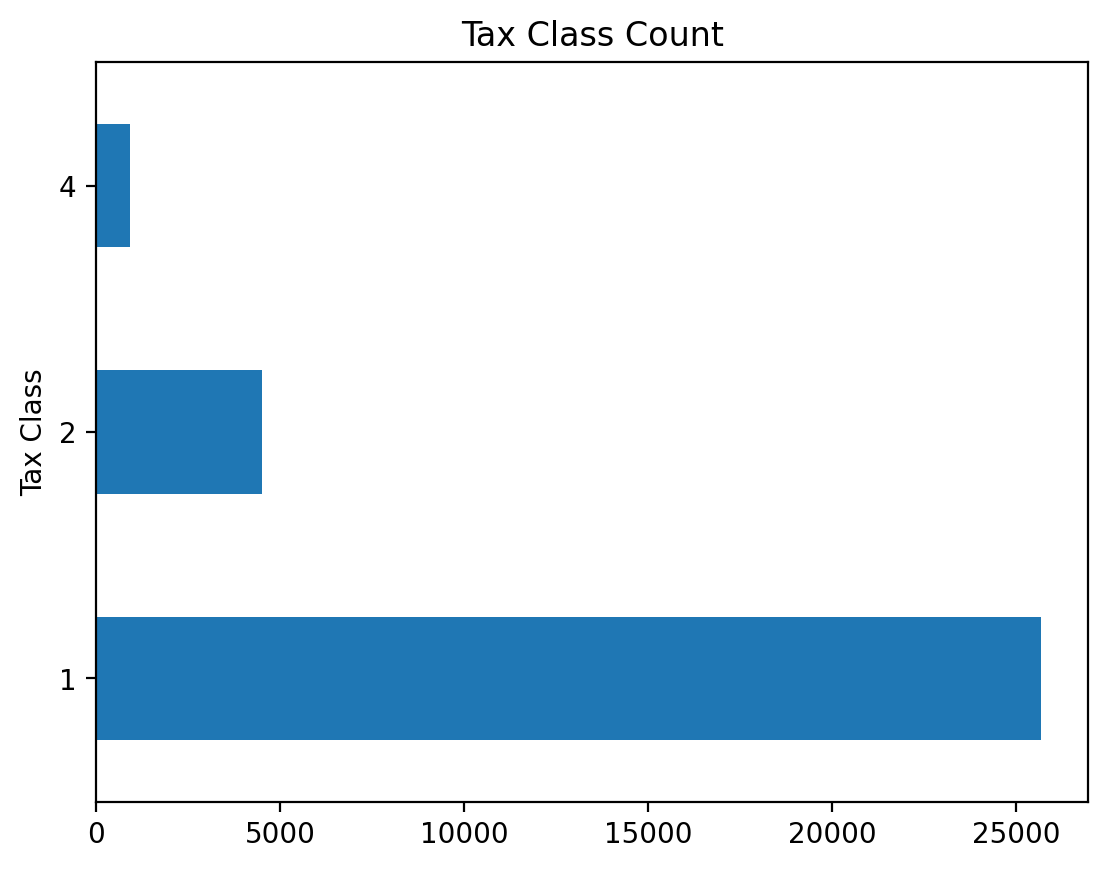

In [297]:
df['Tax Class'].value_counts().plot(kind='barh')
plt.title("Tax Class Count")

<Axes: xlabel='Tax Class', ylabel='Sale Price'>

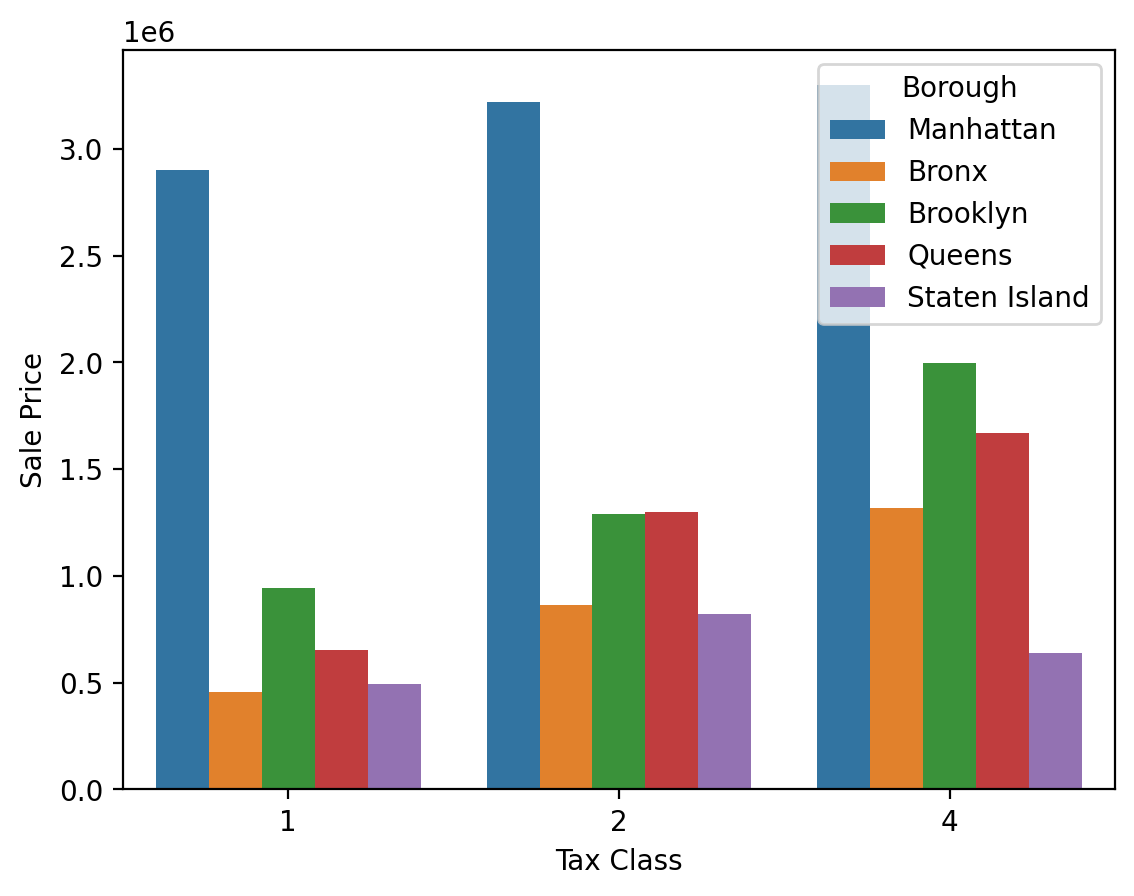

In [283]:
sns.barplot(data =df, x='Tax Class', y = 'Sale Price', ci = None,hue='Borough')

In [284]:
df.shape

(31107, 13)

<Axes: >

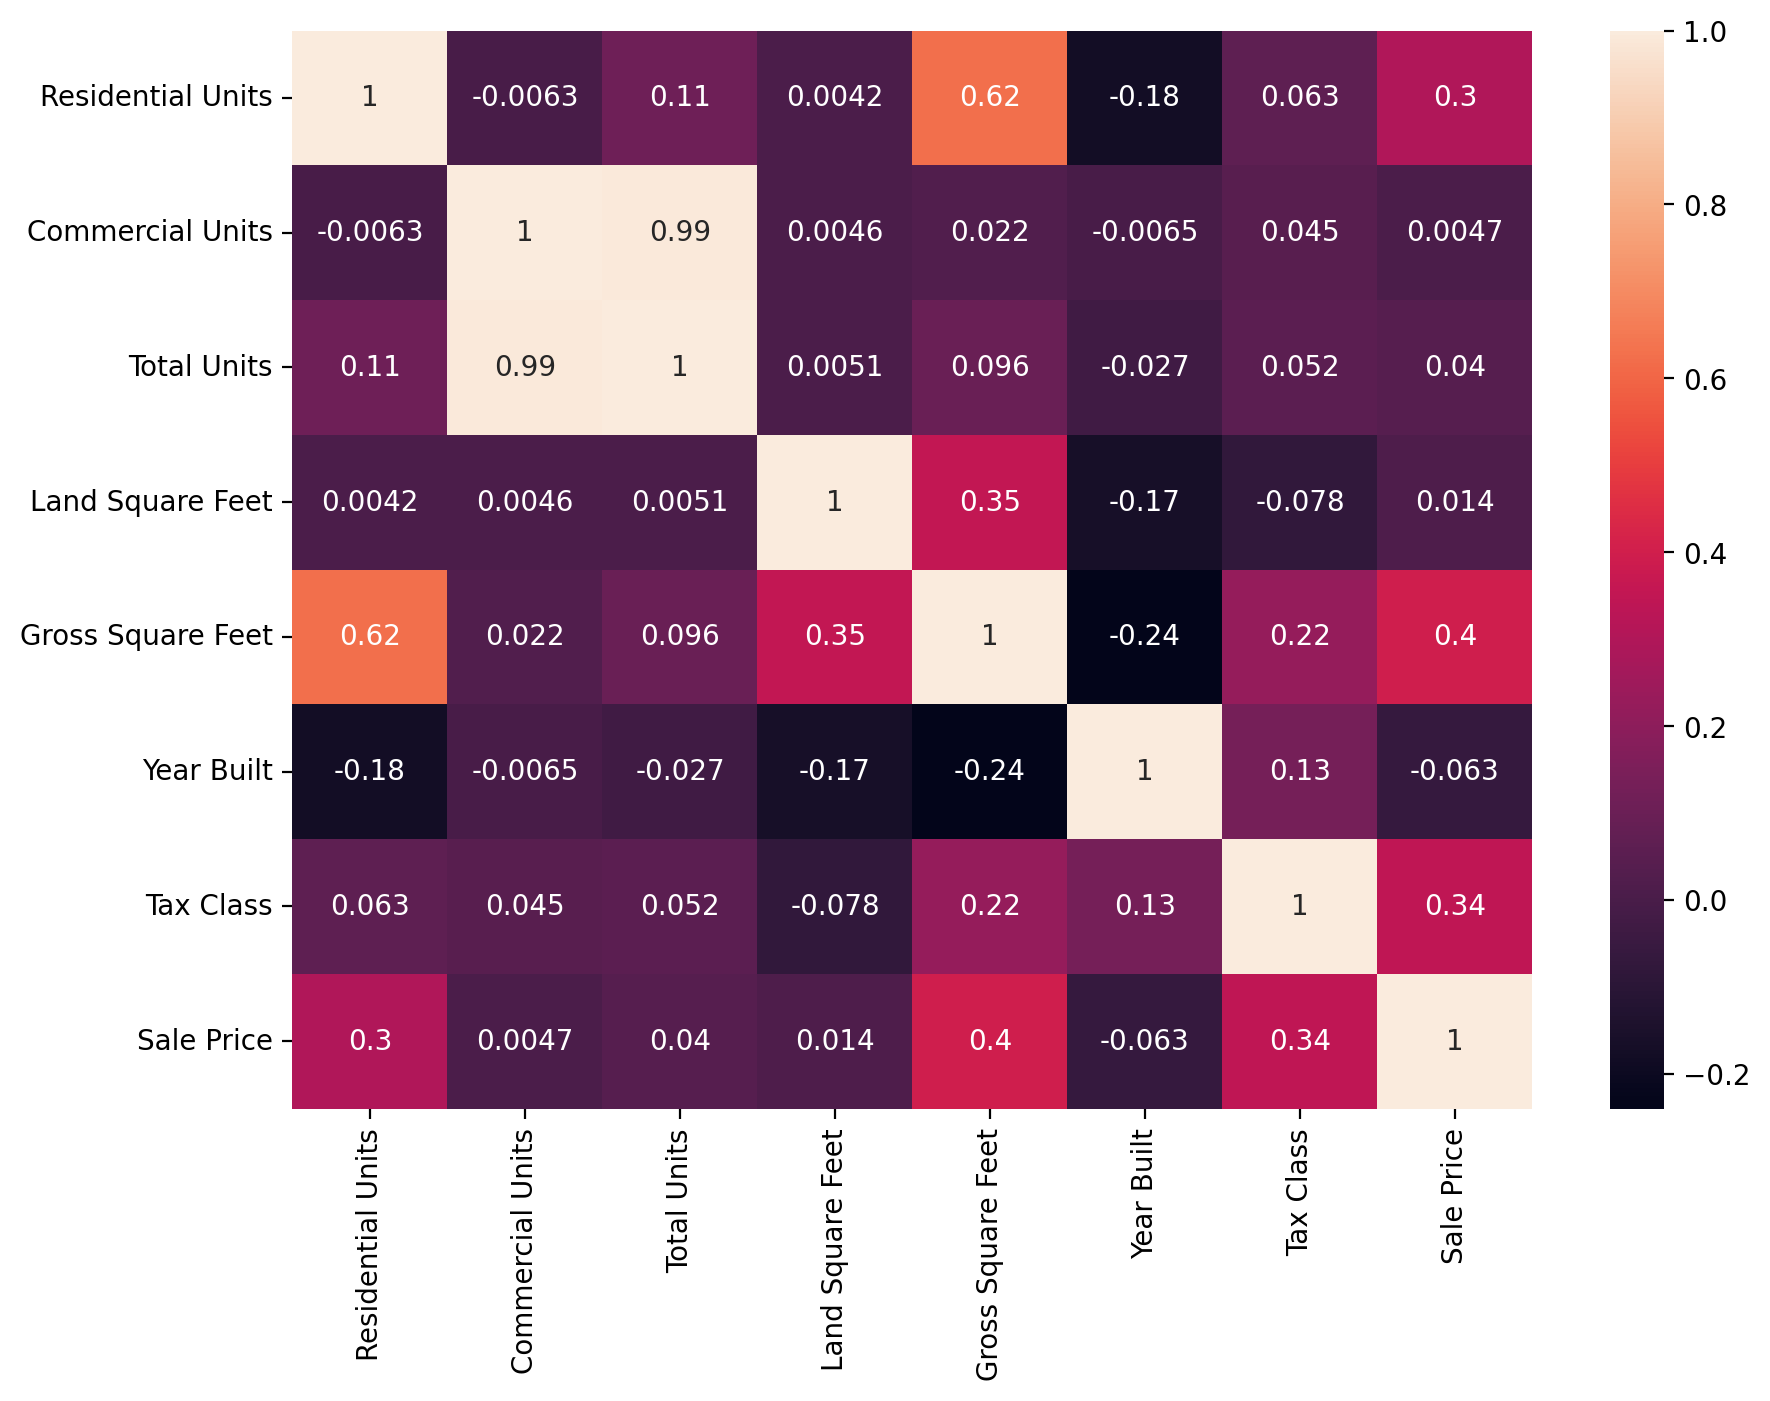

In [291]:
plt.figure(figsize=(10,7))
sns.heatmap(data = df[numeric_columns].corr(), annot = True)